In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import re
import time
import warnings
warnings.filterwarnings("ignore") 

from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold,KFold,RepeatedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import wilcoxon
import scipy.stats as stats
import random


from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from keras.layers import LeakyReLU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statistics

In [2]:
menh_data=pd.read_csv('mental_healthdataset.csv')
menh_data.head(10)

,SE,PE,PR,PrevE,FH,MDpast,currMD
0,0,1,0,1,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0
4,0,1,0,1,0,1,0
5,0,1,0,1,0,1,0
6,0,1,0,1,0,1,0
7,0,1,0,1,0,1,0
8,0,1,0,1,0,1,0
9,0,1,0,1,0,1,0


In [3]:
menh_data.shape

(1386, 7)

In [4]:
menh_data['currMD'].value_counts()

1    966
0    420
Name: currMD, dtype: int64

In [5]:
# Percentage of patients have and do not have breast cancer
menh_data['currMD'].value_counts()/menh_data.shape[0]*100 

1    69.69697
0    30.30303
Name: currMD, dtype: float64

## Analyzing Data

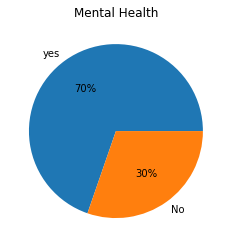

In [6]:
# plot to display the percentage of the people having and not having breast cancer 
labels = ['yes', 'No']
values = menh_data['currMD'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Mental Health')
plt.show()

<AxesSubplot:xlabel='currMD', ylabel='count'>

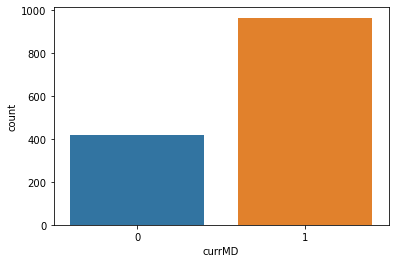

In [7]:
sns.countplot(x='currMD',data=menh_data)

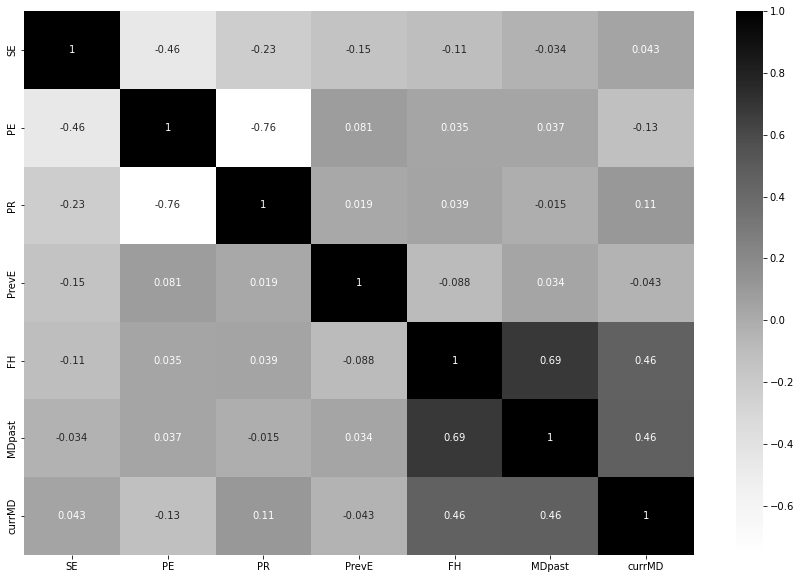

In [8]:
# Correlation map
plt.figure(figsize=(15, 10))
sns.heatmap(menh_data.corr(), annot = True, cmap = "Greys")
plt.show()

## Data Wrangling

In [9]:
menh_data.isnull()

,SE,PE,PR,PrevE,FH,MDpast,currMD
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1381,False,False,False,False,False,False,False
1382,False,False,False,False,False,False,False
1383,False,False,False,False,False,False,False
1384,False,False,False,False,False,False,False


In [10]:
menh_data.isnull().sum()

SE        0
PE        0
PR        0
PrevE     0
FH        0
MDpast    0
currMD    0
dtype: int64

## Data preprocessing

In [11]:
X=menh_data.drop('currMD',axis=1)
y=menh_data["currMD"]
y_label = menh_data['currMD'].values.reshape(X.shape[0], 1)
headers = X.columns

X = preprocessing.minmax_scale(X, feature_range=(0.001, 1))
X= pd.DataFrame(X)
X.columns = headers

## Training Data & Evaluating ML Models

## SVC

Accuracy: 81.41414141414141
Precision: 89.65010828357441
Recall: 84.86921415641258
f1_score: 87.03133088750246
AUC: 0.7935879883120968
Standard deviation of accuracy:  0.008406815358779112
Standard deviation of precision:  0.04495628613456221
Standard deviation of recall:  0.033374590075043176
Standard deviation of f1_score:  0.00703925423596288
Standard deviation of AUC:  0.022453826999601398


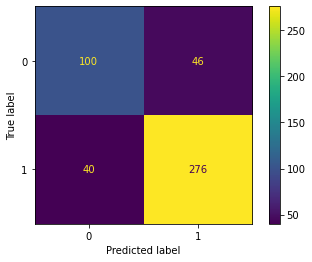

In [12]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy1 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sv = SVC()
    y_pred = fit_eval_model(sv, X_train, y_train, X_test, y_test)

    accuracy1.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy1)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy1))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## RandomForest Classifier

Accuracy: 81.4069264069264
Precision: 90.22371174772788
Recall: 84.49705983873635
f1_score: 87.09650087374764
AUC: 0.7959016691664235
Standard deviation of accuracy:  0.008322154367444478
Standard deviation of precision:  0.04630083227021667
Standard deviation of recall:  0.03378854593722379
Standard deviation of f1_score:  0.007303463125740274
Standard deviation of AUC:  0.0236506124702034


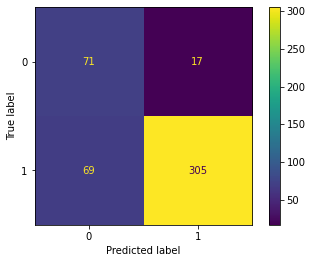

In [13]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy2 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier()
    y_pred = fit_eval_model(rf, X_train, y_train, X_test, y_test)

    accuracy2.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy2)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy2))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Ada Boost Classifier

Accuracy: 75.09379509379511
Precision: 89.0499520104785
Recall: 78.36985649438627
f1_score: 83.2925312807076
AUC: 0.7069660838930883
Standard deviation of accuracy:  0.02643599068456169
Standard deviation of precision:  0.021468900928451096
Standard deviation of recall:  0.03517517818567561
Standard deviation of f1_score:  0.016508783583438446
Standard deviation of AUC:  0.029960885036572456


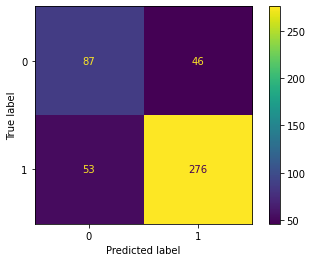

In [14]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy3 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ab = AdaBoostClassifier()
    y_pred = fit_eval_model(ab, X_train, y_train, X_test, y_test)

    accuracy3.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy3)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy3))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Gradient boosting Classifier

Accuracy: 81.4069264069264
Precision: 90.21822015554487
Recall: 84.49416757840446
f1_score: 87.09266605021672
AUC: 0.7961292824457125
Standard deviation of accuracy:  0.008322154367444478
Standard deviation of precision:  0.04701545597184526
Standard deviation of recall:  0.03310779721833764
Standard deviation of f1_score:  0.007816621928018621
Standard deviation of AUC:  0.024378863567532418


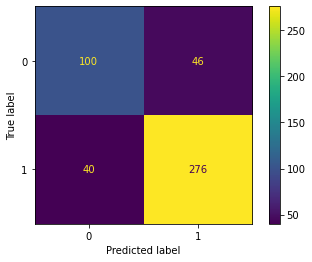

In [15]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy4 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gb = GradientBoostingClassifier(random_state = 1)
    y_pred = fit_eval_model(gb, X_train, y_train, X_test, y_test)

    accuracy4.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy4)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy4))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Logistic Regression

Accuracy: 79.1919191919192
Precision: 89.77330474783457
Recall: 82.23049505136427
f1_score: 85.74517364389234
AUC: 0.7620874209090206
Standard deviation of accuracy:  0.020158968621384634
Standard deviation of precision:  0.023206772492025407
Standard deviation of recall:  0.036342300803867446
Standard deviation of f1_score:  0.012703775826271961
Standard deviation of AUC:  0.018065134599339797


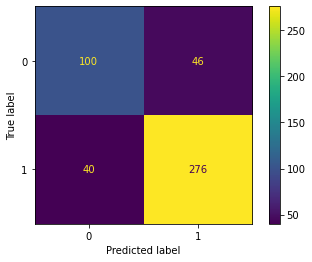

In [16]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy5 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lg = LogisticRegression(random_state = 1,solver='lbfgs', max_iter=1000)
    y_pred = fit_eval_model(lg, X_train, y_train, X_test, y_test)

    accuracy5.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy5)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy5))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

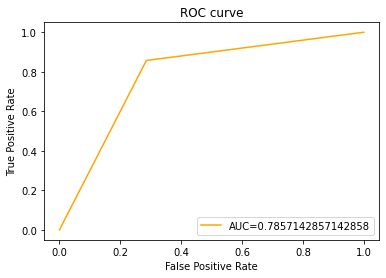

In [17]:
y_pred_proba = sv.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

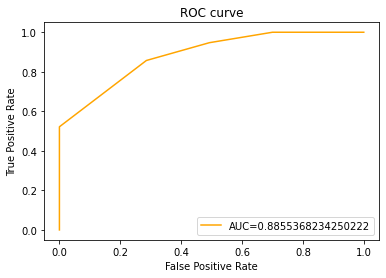

In [18]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

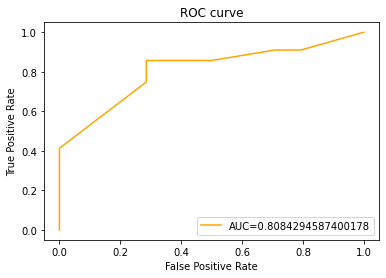

In [19]:
y_pred_proba = ab.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

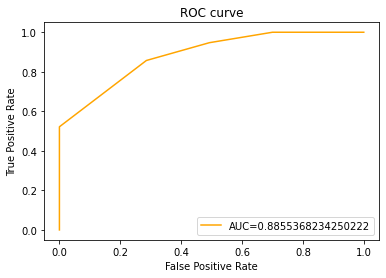

In [20]:
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

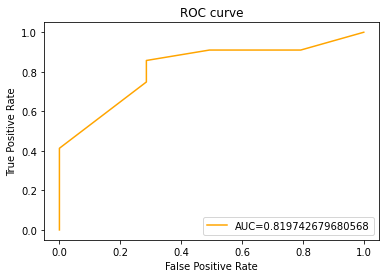

In [21]:
y_pred_proba = lg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hypertuning ML Models

## Gradient Boosting Classifier

Optimal hyperparameter combination: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 10, 'max_features': 1, 'n_estimators': 150}

Mean cross-validated training accuracy score: 0.8122850122850125
Test accuracy: 84.17266187050359
Precision: 84.21052631578947
Recall: 96.0
F1 score: 89.71962616822428
AUC score: 0.7492307692307693
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 10, 'max_features': 1, 'n_estimators': 150}

Mean cross-validated training accuracy score: 0.824013104013104
Test accuracy: 79.49640287769785
Precision: 77.48917748917748
Recall: 97.28260869565217
F1 score: 86.26506024096385
AUC score: 0.7098172987974098
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'friedman_mse', 'l

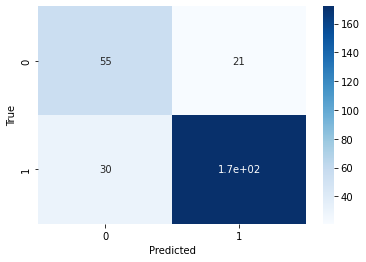

In [22]:
#-------------------------------------------------GridSearchCV-----------------------------------------------------#
best_params_list1=[]
ac_list1=[]
start = time.time()
    
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'learning_rate':(0.01, 1),
                        'n_estimators':(50, 150),
                        'criterion':['friedman_mse', 'squared_error']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_1 = GridSearchCV(gb, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    gs_1.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_1.best_params_)
    best_params_list1.append(gs_1.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_1.best_score_)
    gs_1.best_estimator_.fit(X_train, y_train)
    y_pred = gs_1.best_estimator_.predict(X_test)    # Predictions
    y_true = y_test                                  # True values
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list1.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')
    
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 82.09712230215825
Precision: 95.71813988669113
Recall: 81.67357282492193
f1_score: 88.1188616543992
AUC: 0.8281409254350862
Standard deviation of accuracy:  0.021073213199653086
Standard deviation of precision:  0.012073894294249621
Standard deviation of recall:  0.024087101507390175
Standard deviation of f1_score:  0.015334487794703366
Standard deviation of AUC:  0.02418647736829433


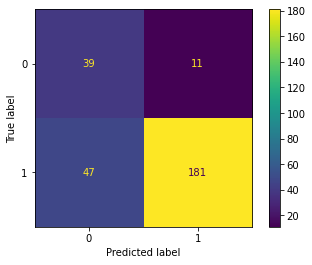

In [23]:
accuracy6=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list1[ac_list1.index(max(ac_list1))]
criterion=par['criterion']
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    gb1 = GradientBoostingClassifier(criterion= criterion, learning_rate= learning_rate, max_depth= max_depth, 
                                     max_features=max_features, n_estimators= n_estimators)
    gb1.fit(X_train, y_train)
    y_pred = gb1.predict(X_test)
    
 
    accuracy6.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy6)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy6))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

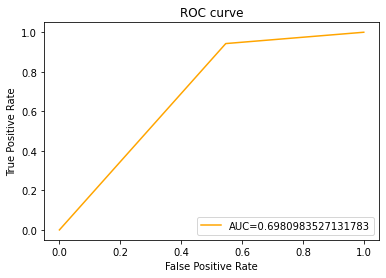

In [24]:
y_pred_proba = gb1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 10, 'max_depth': 10, 'learning_rate': 0.01, 'criterion': 'squared_error'}

Mean cross-validated training accuracy score: 0.8185913185913186
Test accuracy: 81.65467625899281
Precision: 81.77966101694916
Recall: 96.01990049751244
F1 score: 88.3295194508009
AUC score: 0.700878723266783
-----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 10, 'max_depth': 10, 'learning_rate': 0.01, 'criterion': 'squared_error'}

Mean cross-validated training accuracy score: 0.8204258804258805
Test accuracy: 80.93525179856115
Precision: 82.02764976958525
Recall: 92.70833333333334
F1 score: 87.04156479217605
AUC score: 0.7367974806201552
-----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 1

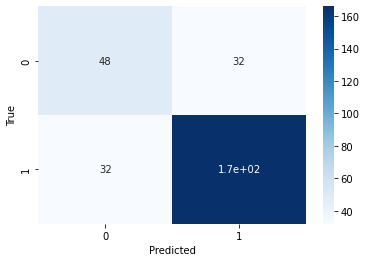

In [25]:
#-------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list2=[]
ac_list2=[]
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'learning_rate':(0.01, 1),
                        'n_estimators':(50, 150),
                        'criterion':['friedman_mse', 'squared_error']}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_1 = RandomizedSearchCV(gb, param_distributions=hyperparameter_space,n_iter=10, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    rs_1.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_1.best_params_)
    best_params_list2.append(rs_1.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_1.best_score_)
    rs_1.best_estimator_.fit(X_train, y_train)
    y_pred = rs_1.best_estimator_.predict(X_test) # Predictions
    y_true = y_test # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list2.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('-----------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 81.82733812949638
Precision: 95.67278680052831
Recall: 81.50033367064458
f1_score: 88.00039291903713
AUC: 0.8241906465905734
Standard deviation of accuracy:  0.018677065390077137
Standard deviation of precision:  0.014331335542193792
Standard deviation of recall:  0.020843196029191345
Standard deviation of f1_score:  0.013511348292782907
Standard deviation of AUC:  0.026124409098168263


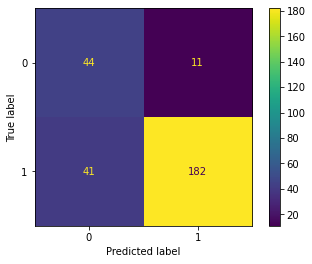

In [26]:
accuracy7=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list2[ac_list2.index(max(ac_list2))]
criterion=par['criterion']
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    gb2 = GradientBoostingClassifier(criterion= criterion, learning_rate= learning_rate, max_depth= max_depth, 
                                     max_features=max_features, n_estimators= n_estimators)
    gb2.fit(X_train, y_train)
    y_pred = gb2.predict(X_test)
    accuracy7.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy7)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy7))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

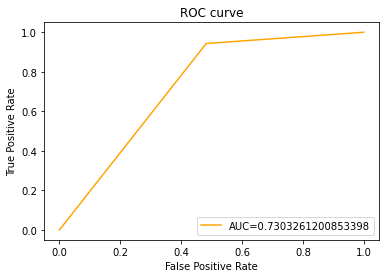

In [27]:
y_pred_proba = gb2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [28]:
#--------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]
row, col=X.shape

start = time.time()
params_gbm ={
    'max_depth':(1,10), 
    'max_features':(1,10),
    'learning_rate':(0.01, 1),
    'n_estimators':(50, 150)
}

# Gradient Boosting Machine
def gbm_cl_bo(max_depth, max_features, learning_rate, n_estimators):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['learning_rate'] = learning_rate
    params_gbm['n_estimators'] = round(n_estimators)
    
    model = gb
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f


training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]
        
gbm_bo_1 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_1.maximize(init_points=10,n_iter=4)
        
        
print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_1.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm['max_features'] = round(params_gbm['max_features'])
print('Best hyperparameters:')
print(params_gbm)
        
end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.8165    | 0.3808    | 9.556     | 7.588     | 109.9     |
| 2         | 0.8165    | 0.1645    | 2.404     | 1.523     | 136.6     |
| 3         | 0.8165    | 0.6051    | 7.373     | 1.185     | 147.0     |
| 4         | 0.8165    | 0.8341    | 2.911     | 2.636     | 68.34     |
| 5         | 0.8165    | 0.3112    | 5.723     | 4.888     | 79.12     |
| 6         | 0.8165    | 0.6157    | 2.255     | 3.629     | 86.64     |
| 7         | 0.8165    | 0.4615    | 8.067     | 2.797     | 101.4     |
| 8         | 0.8165    | 0.5965    | 1.418     | 6.468     | 67.05     |
| 9         | 0.8165    | 0.0744    | 9.54      | 9.691     | 130.8     |
| 10        | 0.8165    | 0.3116    | 1.879     | 7.158     | 94.02     |
| 11        | 0.8165    | 0.5991    | 9.988     | 9.5       | 50.27     |
| 12        | 0.8165    | 0.05873   | 

Accuracy: 81.11870503597122
Precision: 90.21743450257873
Recall: 84.17479404564813
f1_score: 86.90017736911304
AUC: 0.7933372368354954
Standard deviation of accuracy:  0.01927637084610636
Standard deviation of precision:  0.04896743674537045
Standard deviation of recall:  0.03875054651538083
Standard deviation of f1_score:  0.015144473232258484
Standard deviation of AUC:  0.03203378617451501


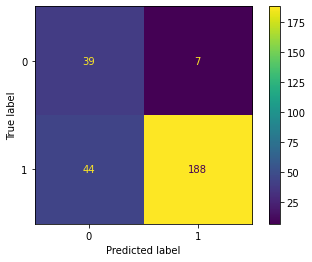

In [29]:
accuracy8=[]
precision=[]
recall=[]
f1score=[]
auc=[]


par=params_gbm
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    gb3 = GradientBoostingClassifier(n_estimators= n_estimators, max_features=max_features, max_depth= max_depth, learning_rate=learning_rate)
    gb3.fit(X_train, y_train)
    y_pred = gb3.predict(X_test)
    
    accuracy8.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy8)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy8))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

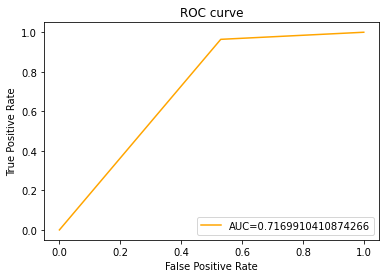

In [30]:
y_pred_proba = gb3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Random Forest Classifier

Optimal hyperparameter combination: {'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'n_estimators': 150}

Mean cross-validated training accuracy score: 0.8186322686322687
Test accuracy: 81.65467625899281
Precision: 88.02083333333334
Recall: 85.78680203045685
F1 score: 86.88946015424163
AUC score: 0.7869587015103091
----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'n_estimators': 150}

Mean cross-validated training accuracy score: 0.8077968877968879
Test accuracy: 83.09352517985612
Precision: 83.69098712446352
Recall: 95.58823529411765
F1 score: 89.24485125858124
AUC score: 0.7211844197138315
----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'n_estimators': 5

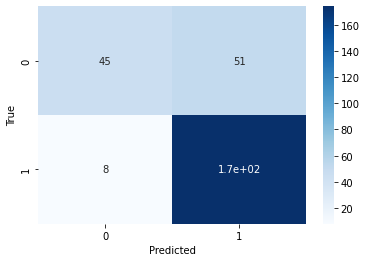

In [31]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list4=[]
ac_list4=[]   
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'n_estimators':(50, 150),
                        'criterion':['gini', 'entropy']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)


row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_2 = GridSearchCV(rf, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

    gs_2.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_2.best_params_)
    best_params_list4.append(gs_2.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_2.best_score_)
    gs_2.best_estimator_.fit(X_train, y_train)
    y_pred = gs_2.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list4.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:",roc_auc_score(y_true, y_pred))
    print('----------------------------------------------------------------------------------------------------------------')
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 80.78057553956835
Precision: 90.91119729590582
Recall: 83.34058055211854
f1_score: 86.75783226360704
AUC: 0.7935190469560807
Standard deviation of accuracy:  0.020272816850598407
Standard deviation of precision:  0.04960054380798615
Standard deviation of recall:  0.04082585007490934
Standard deviation of f1_score:  0.01590277281788869
Standard deviation of AUC:  0.030790315144252442


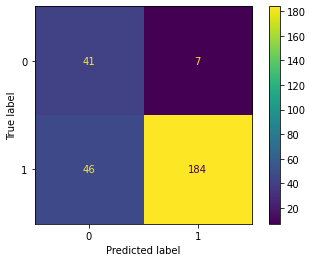

In [32]:
accuracy9=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list4[ac_list4.index(max(ac_list4))]
criterion=par['criterion']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    rf1 = RandomForestClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators=n_estimators)
    rf1.fit(X_train, y_train)
    y_pred = rf1.predict(X_test)
    
    accuracy9.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy9)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy9))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

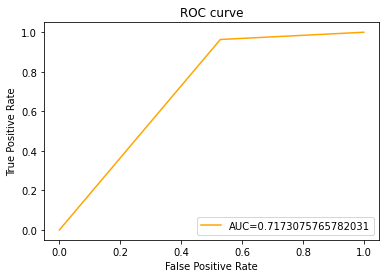

In [33]:
y_pred_proba = rf1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 50, 'max_features': 1, 'max_depth': 10, 'criterion': 'gini'}

Mean cross-validated training accuracy score: 0.8013677313677313
Test accuracy: 81.65467625899281
Precision: 86.15384615384616
Recall: 87.5
F1 score: 86.82170542635659
AUC score: 0.7805232558139534
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 50, 'max_features': 1, 'max_depth': 10, 'criterion': 'gini'}

Mean cross-validated training accuracy score: 0.814930384930385
Test accuracy: 79.49640287769785
Precision: 77.10280373831776
Recall: 95.37572254335261
F1 score: 85.27131782945737
AUC score: 0.7435452793834297
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 50, 'max_features': 1, 'max_depth': 10, 'criterion': 'entropy'}

Mean cross-v

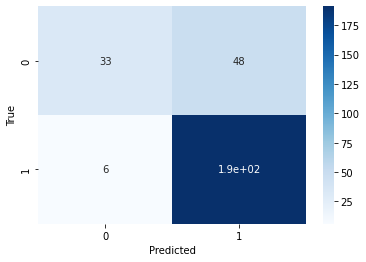

In [34]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list5=[]
ac_list5=[]
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'n_estimators':(50, 150),
                        'criterion':['gini', 'entropy']}

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_2 = RandomizedSearchCV(rf, param_distributions=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    rs_2.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_2.best_params_)
    best_params_list5.append(rs_2.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_2.best_score_)
    rs_2.best_estimator_.fit(X_train, y_train)
    y_pred = rs_2.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list5.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:",roc_auc_score(y_true, y_pred))
    print('-------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 80.79496402877697
Precision: 90.31110745819541
Recall: 83.66424153836499
f1_score: 86.64522616534784
AUC: 0.7937449532007753
Standard deviation of accuracy:  0.018777668900589035
Standard deviation of precision:  0.05227184449256026
Standard deviation of recall:  0.04036537136186816
Standard deviation of f1_score:  0.015491447822439407
Standard deviation of AUC:  0.03240806874281802


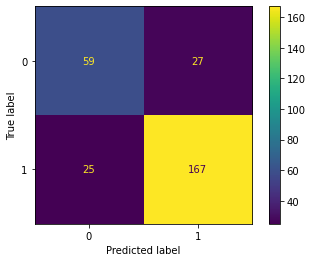

In [35]:
accuracy10=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list5[ac_list5.index(max(ac_list5))]
creation=par['criterion']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    rf2 = RandomForestClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators=n_estimators)
    rf2.fit(X_train, y_train)
    y_pred = rf2.predict(X_test)
    
    accuracy10.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy10)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy10))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

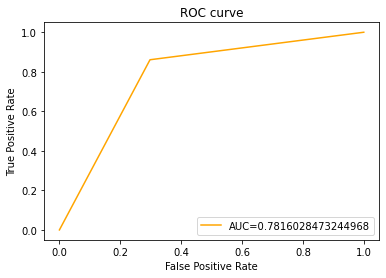

In [36]:
y_pred_proba = rf2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [37]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

params_gbm ={
    'max_depth':(1,10), 
    'max_features':(1,10),
    'n_estimators':(50, 150)
}

start = time.time()

def gbm_cl_bo(max_depth, max_features, n_estimators):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['n_estimators'] = round(n_estimators)
   
    model = rf
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f
   
training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]
    
# Run Bayesian Optimization

gbm_bo_2 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_2.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_2.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm['max_features'] = round(params_gbm['max_features'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
| 1         | 0.8165    | 4.371     | 9.556     | 123.2     |
| 2         | 0.8165    | 6.388     | 2.404     | 65.6      |
| 3         | 0.8165    | 1.523     | 8.796     | 110.1     |
| 4         | 0.8165    | 7.373     | 1.185     | 147.0     |
| 5         | 0.8165    | 8.492     | 2.911     | 68.18     |
| 6         | 0.8165    | 2.651     | 3.738     | 102.5     |
| 7         | 0.8165    | 4.888     | 3.621     | 111.2     |
| 8         | 0.8165    | 2.255     | 3.629     | 86.64     |
| 9         | 0.8165    | 5.105     | 8.067     | 69.97     |
| 10        | 0.8165    | 5.628     | 6.332     | 54.65     |
| 11        | 0.8165    | 9.903     | 8.867     | 149.8     |
| 12        | 0.8165    | 2.447     | 4.591     | 58.65     |
| 13        | 0.8165    | 3.927     | 5.312     | 64.28     |
| 14        | 0.8165    | 9.487     | 4.311     | 72.13     |
Accuracy

Accuracy: 81.28776978417268
Precision: 92.16762281147344
Recall: 83.10492815133648
f1_score: 87.21271797355341
AUC: 0.8045458126048204
Standard deviation of accuracy:  0.020514590163231382
Standard deviation of precision:  0.047887432142960505
Standard deviation of recall:  0.039914886618090825
Standard deviation of f1_score:  0.015906040675845216
Standard deviation of AUC:  0.03306323504028178


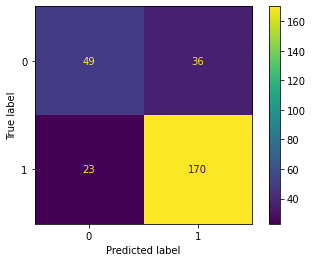

In [38]:
accuracy11=[]
precision=[]
recall=[]
f1score=[]
auc=[]


par=params_gbm
n_estimators=par['n_estimators']
max_features=par['max_features']
max_depth=par['max_depth']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    rf3 = RandomForestClassifier(n_estimators= n_estimators, max_features=max_features, max_depth= max_depth )
    rf3.fit(X_train, y_train)
    y_pred = rf3.predict(X_test)

    accuracy11.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy11)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy11))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

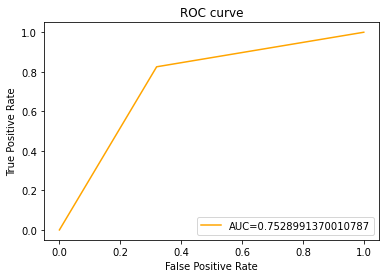

In [39]:
y_pred_proba = rf3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## SVC

Optimal hyperparameter combination: {'C': 3, 'degree': 5}

Mean cross-validated training accuracy score: 0.8167649467649468
Test accuracy: 82.37410071942446
Precision: 87.3015873015873
Recall: 86.8421052631579
F1 score: 87.07124010554091
AUC score: 0.7978468899521531
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 3, 'degree': 5}

Mean cross-validated training accuracy score: 0.7995823095823096
Test accuracy: 83.09352517985612
Precision: 86.97916666666666
Recall: 88.35978835978835
F1 score: 87.66404199475065
AUC score: 0.8013495035966947
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 3, 'degree': 5}

Mean cross-validated training accuracy score: 0.8095577395577396
Test accuracy: 83.09352517985612
Precision: 89.8989898989899
Recall: 86.82926829268293
F1 score: 88.33746898

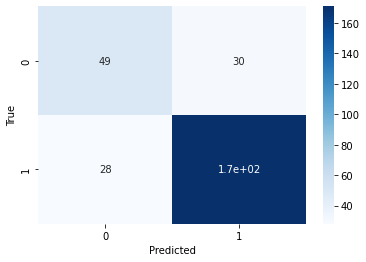

In [40]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list7=[]
ac_list7=[]
    
hyperparameter_space = {'C':(3,10), 
                        'degree':(5,20)}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_3 = GridSearchCV(sv, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

    gs_3.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_3.best_params_)
    best_params_list7.append(gs_3.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_3.best_score_)
    gs_3.best_estimator_.fit(X_train, y_train)
    y_pred = gs_3.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list7.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 81.2158273381295
Precision: 90.14682367854371
Recall: 84.34307726032037
f1_score: 86.92568092852629
AUC: 0.7976310639618517
Standard deviation of accuracy:  0.0184453983147988
Standard deviation of precision:  0.055355694010850595
Standard deviation of recall:  0.03871912212412123
Standard deviation of f1_score:  0.015700604564678478
Standard deviation of AUC:  0.03703327763201171


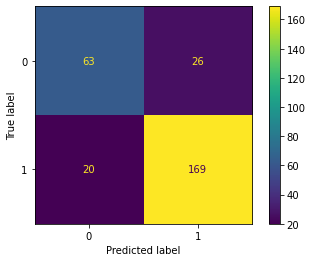

In [41]:
accuracy12=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list7[ac_list7.index(max(ac_list7))]
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    sv1 = SVC(C=C, degree=degree )
    sv1.fit(X_train, y_train)
    y_pred = sv1.predict(X_test)
    
    accuracy12.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy12)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy12))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

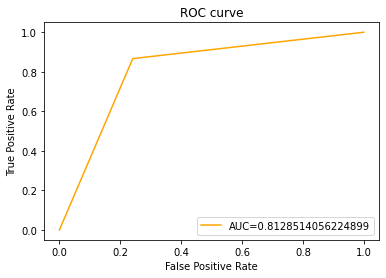

In [42]:
y_pred_proba = sv1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'degree': 5, 'C': 3}

Mean cross-validated training accuracy score: 0.8059623259623259
Test accuracy: 83.09352517985612
Precision: 81.57894736842105
Recall: 97.38219895287958
F1 score: 88.78281622911693
AUC score: 0.7455316844195703
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'degree': 5, 'C': 3}

Mean cross-validated training accuracy score: 0.8095904995904997
Test accuracy: 81.29496402877699
Precision: 88.29787234042553
Recall: 84.6938775510204
F1 score: 86.45833333333334
AUC score: 0.7893230462916875
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'degree': 5, 'C': 3}

Mean cross-validated training accuracy score: 0.8195331695331696
Test accuracy: 81.29496402877699
Precision: 85.9375
Recall: 86.8421052631579
F1 score: 86.3874345549738

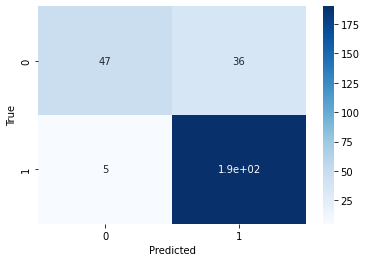

In [43]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list8=[]
ac_list8=[]
hyperparameter_space = {'C':(3,10), 
                        'degree':(5,20)}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_3 = RandomizedSearchCV(sv, param_distributions=hyperparameter_space,scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    rs_3.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_3.best_params_)
    best_params_list8.append(rs_3.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_3.best_score_)
    rs_3.best_estimator_.fit(X_train, y_train)
    y_pred = rs_3.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list8.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 81.1726618705036
Precision: 89.87063409402195
Recall: 84.53617833142646
f1_score: 86.93945514689275
AUC: 0.7910368982430858
Standard deviation of accuracy:  0.0172111432767368
Standard deviation of precision:  0.04869555626904068
Standard deviation of recall:  0.0367970156051888
Standard deviation of f1_score:  0.014664947191074466
Standard deviation of AUC:  0.02888055714081877


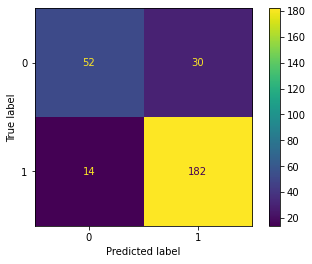

In [44]:
accuracy13=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list8[ac_list8.index(max(ac_list8))]
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    sv2 = SVC(C=C, degree=degree )
    sv2.fit(X_train, y_train)
    y_pred = sv2.predict(X_test)

    accuracy13.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy13)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy13))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

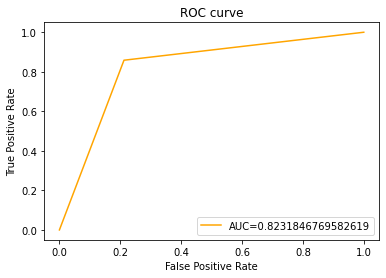

In [45]:
y_pred_proba = sv2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [46]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]


params_gbm ={
    'C':(3,10), 
    'degree':(5,20)
}

start = time.time()

def gbm_cl_bo(C, degree):
    params_gbm = {}
    params_gbm['C'] = round(C)
    params_gbm['degree'] = degree
   
    model = sv
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_3 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_3.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])


params_gbm = gbm_bo_3.max['params']
params_gbm['C'] = round(params_gbm['C'])
params_gbm['degree'] = round(params_gbm['degree'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   |     C     |  degree   |
-------------------------------------------------
| 1         | 0.8345    | 5.622     | 19.26     |
| 2         | 0.8345    | 8.124     | 13.98     |
| 3         | 0.8345    | 4.092     | 7.34      |
| 4         | 0.8345    | 3.407     | 17.99     |
| 5         | 0.8345    | 7.208     | 15.62     |
| 6         | 0.8345    | 3.144     | 19.55     |
| 7         | 0.8345    | 8.827     | 8.185     |
| 8         | 0.8345    | 4.273     | 7.751     |
| 9         | 0.8345    | 5.13      | 12.87     |
| 10        | 0.8345    | 6.024     | 9.368     |
| 11        | 0.8345    | 7.711     | 12.96     |
| 12        | 0.8345    | 9.989     | 5.006     |
| 13        | 0.8345    | 9.74      | 20.0      |
| 14        | 0.8345    | 9.966     | 5.04      |
Accuracy: 83.45323741007195
Precision: 89.79591836734694
F1-Score: 88.44221105527637
Recall: 87.12871287128714
AUC: 0.8040646169880147
Best hyperparameters:
{'C': 6, 'degree': 19}
Execution time of Ba

Accuracy: 81.3021582733813
Precision: 90.35949116268813
Recall: 84.25523159755386
f1_score: 87.01072876660658
AUC: 0.796822347092909
Standard deviation of accuracy:  0.019272878666990945
Standard deviation of precision:  0.05077825432235318
Standard deviation of recall:  0.03739037468535973
Standard deviation of f1_score:  0.016195271620556995
Standard deviation of AUC:  0.03519938083940152


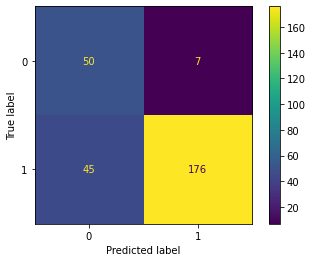

In [47]:
accuracy14=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    sv3 = SVC(C=C, degree=degree )
    sv3.fit(X_train, y_train)
    y_pred = sv3.predict(X_test)

    accuracy14.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy14)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy14))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

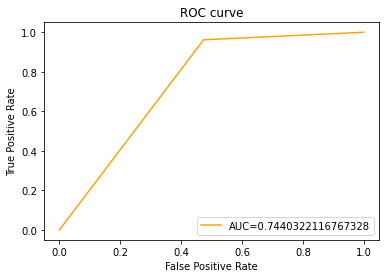

In [48]:
y_pred_proba = sv3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Ada Boost Classifier

Optimal hyperparameter combination: {'algorithm': 'SAMME', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.8176986076986077
Test accuracy: 79.49640287769785
Precision: 85.27918781725889
Recall: 85.71428571428571
F1 score: 85.49618320610686
AUC score: 0.7517421602787456
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'algorithm': 'SAMME.R', 'n_estimators': 3}

Mean cross-validated training accuracy score: 0.778918918918919
Test accuracy: 82.01438848920863
Precision: 84.26395939086294
Recall: 89.72972972972974
F1 score: 86.91099476439791
AUC score: 0.7819819819819821
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'algorithm': 'SAMME', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.8086814086814087
Test accuracy: 79.49640287769785
Precis

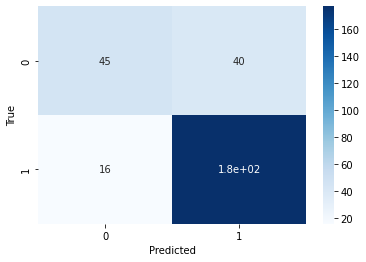

In [49]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list10=[]
ac_list10=[]
   
hyperparameter_space = {'n_estimators':(3,10), 
                        'algorithm':['SAMME', 'SAMME.R']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_4 = GridSearchCV(ab, param_grid=hyperparameter_space, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    gs_4.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_4.best_params_)
    best_params_list10.append(gs_4.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_4.best_score_)
    gs_4.best_estimator_.fit(X_train, y_train)
    y_pred = gs_4.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list10.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 79.45323741007195
Precision: 88.97487640556687
Recall: 83.0870360476196
f1_score: 85.82810541683499
AUC: 0.7613107913433832
Standard deviation of accuracy:  0.025287487840819536
Standard deviation of precision:  0.027435148756380007
Standard deviation of recall:  0.038197835133744674
Standard deviation of f1_score:  0.01633786846325202
Standard deviation of AUC:  0.028353868197400146


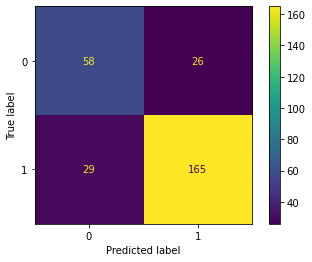

In [50]:
accuracy15=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list10[ac_list10.index(max(ac_list10))]
algorithm=par['algorithm']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab1 = AdaBoostClassifier(algorithm= algorithm, n_estimators=n_estimators )
    ab1.fit(X_train, y_train)
    y_pred = ab1.predict(X_test)
    
    accuracy15.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy15)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy15))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

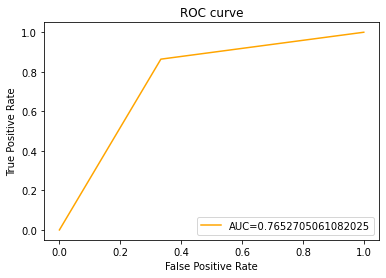

In [51]:
y_pred_proba = ab1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 3, 'algorithm': 'SAMME.R'}

Mean cross-validated training accuracy score: 0.8023341523341525
Test accuracy: 80.93525179856115
Precision: 84.26395939086294
Recall: 88.29787234042553
F1 score: 86.23376623376625
AUC score: 0.7692671394799053
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 3, 'algorithm': 'SAMME.R'}

Mean cross-validated training accuracy score: 0.8168386568386568
Test accuracy: 82.37410071942446
Precision: 86.3849765258216
Recall: 90.19607843137256
F1 score: 88.24940047961631
AUC score: 0.7550344462109168
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 3, 'algorithm': 'SAMME.R'}

Mean cross-validated training accuracy score: 0.7915151515151515
Test accuracy: 77.33812949640287
Prec

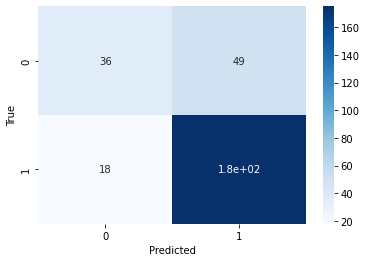

In [52]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list11=[]
ac_list11=[]
hyperparameter_space = {'n_estimators':(3,10), 
                        'algorithm':['SAMME', 'SAMME.R']}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_4 = RandomizedSearchCV(ab, param_distributions=hyperparameter_space,
                            scoring="accuracy",
                            n_jobs=-1, cv=10, return_train_score=True)

    rs_4.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_4.best_params_)
    best_params_list11.append(rs_4.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_4.best_score_)
    rs_4.best_estimator_.fit(X_train, y_train)
    y_pred = rs_4.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list11.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 78.29856115107916
Precision: 89.53926338863081
Recall: 81.30081810083986
f1_score: 85.14435957228324
AUC: 0.7511029789642509
Standard deviation of accuracy:  0.03188003609989852
Standard deviation of precision:  0.028685806478143814
Standard deviation of recall:  0.03713937268012829
Standard deviation of f1_score:  0.022029334039280184
Standard deviation of AUC:  0.04063513421680692


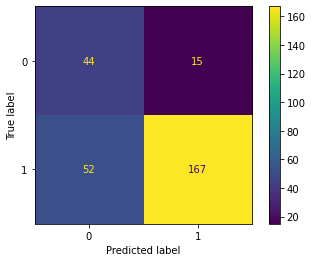

In [53]:
accuracy16=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list11[ac_list11.index(max(ac_list11))]
algorithm=par['algorithm']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab2 = AdaBoostClassifier(algorithm= algorithm, n_estimators=n_estimators )
    ab2.fit(X_train, y_train)
    y_pred = ab2.predict(X_test)
    accuracy16.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy16)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy16))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

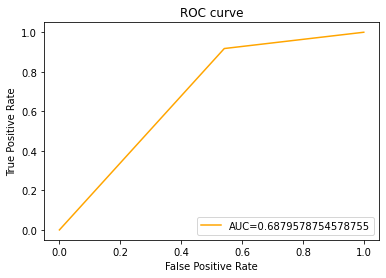

In [54]:
y_pred_proba = ab2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [55]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

start = time.time()

params_gbm ={
    'n_estimators':(3,10)
}

def gbm_cl_bo(n_estimators):
    params_gbm = {}
    params_gbm['n_estimators'] = round(n_estimators)
   
    model = ab
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_4 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_4.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])


params_gbm = gbm_bo_4.max['params']
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.7302    | 5.622     |
| 2         | 0.7302    | 9.655     |
| 3         | 0.7302    | 8.124     |
| 4         | 0.7302    | 7.191     |
| 5         | 0.7302    | 4.092     |
| 6         | 0.7302    | 4.092     |
| 7         | 0.7302    | 3.407     |
| 8         | 0.7302    | 9.063     |
| 9         | 0.7302    | 7.208     |
| 10        | 0.7302    | 7.957     |
| 11        | 0.7302    | 6.522     |
| 12        | 0.7302    | 3.001     |
| 13        | 0.7302    | 9.999     |
| 14        | 0.7302    | 5.098     |
Accuracy: 73.02158273381295
Precision: 75.21739130434783
F1-Score: 82.18527315914488
Recall: 90.57591623036649
AUC: 0.6252933742552808
Best hyperparameters:
{'n_estimators': 6}
Execution time of Bayesian Optimization (in Seconds): 1.4200422763824463


Accuracy: 77.31654676258994
Precision: 89.50473594113451
Recall: 80.33416092614551
f1_score: 84.57698498283298
AUC: 0.7378255238735403
Standard deviation of accuracy:  0.04010418635121063
Standard deviation of precision:  0.028196841089085732
Standard deviation of recall:  0.045060015903347156
Standard deviation of f1_score:  0.02705743655136355
Standard deviation of AUC:  0.0489031219686508


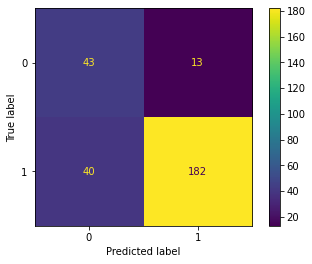

In [56]:
accuracy17=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab3 = AdaBoostClassifier( n_estimators= n_estimators )
    ab3.fit(X_train, y_train)
    y_pred = ab3.predict(X_test)

    accuracy17.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy17)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy17))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

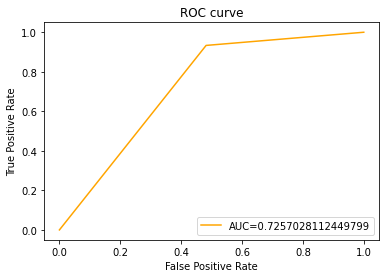

In [57]:
y_pred_proba = ab3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Logistic Regression

Optimal hyperparameter combination: {'C': 0.1, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.7852006552006552
Test accuracy: 79.85611510791367
Precision: 83.11111111111111
Recall: 91.21951219512195
F1 score: 86.9767441860465
AUC score: 0.6958235883728701
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.8222850122850123
Test accuracy: 80.2158273381295
Precision: 85.71428571428571
Recall: 85.26315789473684
F1 score: 85.4881266490765
AUC score: 0.7729066985645932
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.7978132678132678
Test accuracy

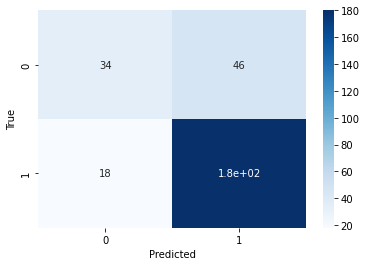

In [58]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list13=[]
ac_list13=[]   
hyperparameter_space = {'max_iter':(500,1000), 
                        'C':(0.1, 10),
                        'intercept_scaling':(1.0,3.0)}
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_5 = GridSearchCV(lg, param_grid=hyperparameter_space, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    gs_5.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_5.best_params_)
    best_params_list13.append(gs_5.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_5.best_score_)
    gs_5.best_estimator_.fit(X_train, y_train)
    y_pred = gs_5.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list13.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('-------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 79.33453237410073
Precision: 90.5596538012112
Recall: 81.91469170739195
f1_score: 85.93198951647429
AUC: 0.7661027395920685
Standard deviation of accuracy:  0.02196911489679777
Standard deviation of precision:  0.028473830536241754
Standard deviation of recall:  0.03433999948842916
Standard deviation of f1_score:  0.01565272069614627
Standard deviation of AUC:  0.02668203835052453


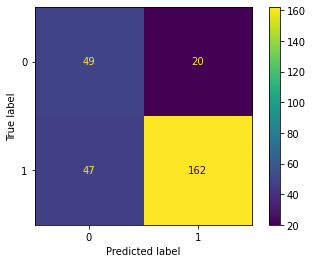

In [59]:
accuracy18=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list13[ac_list13.index(max(ac_list13))]
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr1 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr1.fit(X_train, y_train)
    y_pred = lr1.predict(X_test)
    
    accuracy18.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy18)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy18))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

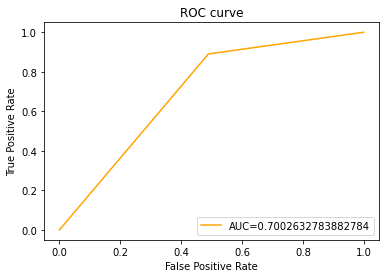

In [60]:
y_pred_proba = lr1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 0.1}

Mean cross-validated training accuracy score: 0.8005651105651106
Test accuracy: 73.7410071942446
Precision: 77.47747747747748
Recall: 88.2051282051282
F1 score: 82.49400479616305
AUC score: 0.6398208217485326
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 10}

Mean cross-validated training accuracy score: 0.7978050778050778
Test accuracy: 80.93525179856115
Precision: 86.77248677248677
Recall: 85.41666666666666
F1 score: 86.08923884514435
AUC score: 0.7817344961240309
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 0.1}

Mean cross-validated training accuracy score: 0.7843488943488943
Test accu

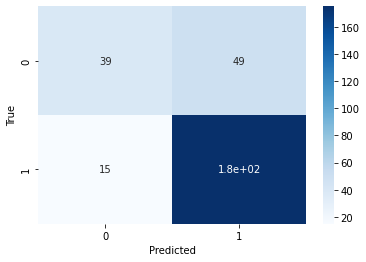

In [61]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list14=[]
ac_list14=[]
hyperparameter_space = {'max_iter':(500,1000), 
                        'C':(0.1, 10),
                        'intercept_scaling':(1.0,3.0)}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    rs_5 = RandomizedSearchCV(lg, param_distributions=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    rs_5.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_5.best_params_)
    best_params_list14.append(rs_5.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_5.best_score_)
    rs_5.best_estimator_.fit(X_train, y_train)
    y_pred = rs_5.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list14.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 79.01798561151081
Precision: 90.00707400046714
Recall: 81.871319766449
f1_score: 85.63592536840925
AUC: 0.762258438598584
Standard deviation of accuracy:  0.021985053121277343
Standard deviation of precision:  0.03136904355778544
Standard deviation of recall:  0.03689652156377047
Standard deviation of f1_score:  0.015380352115982161
Standard deviation of AUC:  0.027277845709120948


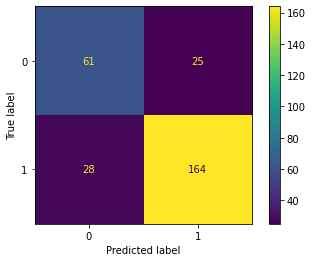

In [62]:
accuracy19=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list14[ac_list14.index(max(ac_list14))]
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr2 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr2.fit(X_train, y_train)
    y_pred = lr2.predict(X_test)
    
    accuracy19.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy19)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy19))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

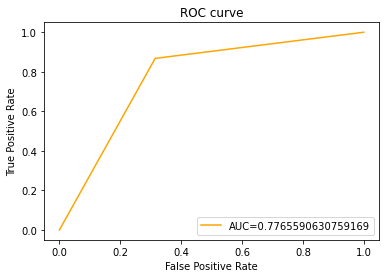

In [63]:
y_pred_proba = lr2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [64]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

start = time.time()
params_gbm ={
    'max_iter':(500,1000), 
    'C':(0.1, 10),
    'intercept_scaling':(1.0,3.0)
}

# LogisticRegression Machine
def gbm_cl_bo(max_iter, C, intercept_scaling):
    params_gbm = {}
    params_gbm['max_iter'] = round(max_iter)
    params_gbm['C'] = C
    params_gbm['intercept_scaling'] = intercept_scaling
    
    model = lg
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)*100))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_5 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_5.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_5.max['params']
params_gbm['max_iter'] = round(params_gbm['max_iter'])
params_gbm['C'] = round(params_gbm['C'])
params_gbm['intercept_scaling'] = round(params_gbm['intercept_scaling'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   |     C     | interc... | max_iter  |
-------------------------------------------------------------
| 1         | 0.8165    | 3.808     | 2.901     | 866.0     |
| 2         | 0.8165    | 6.027     | 1.312     | 578.0     |
| 3         | 0.8165    | 0.675     | 2.732     | 800.6     |
| 4         | 0.8165    | 7.11      | 1.041     | 985.0     |
| 5         | 0.8165    | 8.341     | 1.425     | 590.9     |
| 6         | 0.8165    | 1.916     | 1.608     | 762.4     |
| 7         | 0.8165    | 4.376     | 1.582     | 805.9     |
| 8         | 0.8165    | 1.481     | 1.584     | 683.2     |
| 9         | 0.8165    | 4.615     | 2.57      | 599.8     |
| 10        | 0.8165    | 5.191     | 2.185     | 523.2     |
| 11        | 0.8165    | 9.893     | 2.748     | 998.9     |
| 12        | 0.8165    | 1.692     | 1.798     | 543.3     |
| 13        | 0.8165    | 3.32      | 1.958     | 571.4     |
| 14        | 0.8165    | 9.436     | 1.736     | 610.6     |
Accuracy

Accuracy: 78.9568345323741
Precision: 91.98892433023428
Recall: 80.26582275633933
f1_score: 85.64681829507116
AUC: 0.7763624226285265
Standard deviation of accuracy:  0.027197353050872324
Standard deviation of precision:  0.02282203227055224
Standard deviation of recall:  0.03971356453215173
Standard deviation of f1_score:  0.01822711561559545
Standard deviation of AUC:  0.02890529354689893


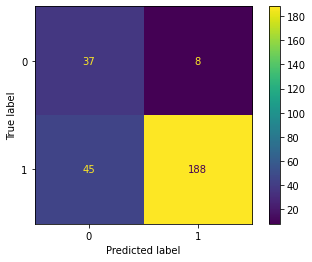

In [65]:
accuracy20=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr3 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr3.fit(X_train, y_train)
    y_pred = lr3.predict(X_test)
    
    accuracy20.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy20)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy20))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

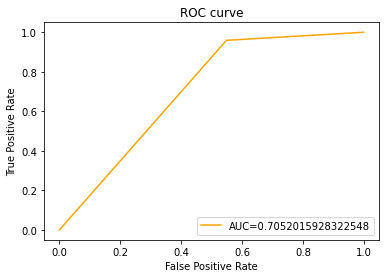

In [66]:
y_pred_proba = lr3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Neural Network Model

15/15 [==============================] - 0s 997us/step
Accuracy: 77.82828282828285
Precision: 89.15567364851277
Recall: 81.24837740974496
f1_score: 84.89453051996591
AUC: 0.7417837262816286
Standard deviation of accuracy:  0.03306014051697977
Standard deviation of precision:  0.02514412090175733
Standard deviation of recall:  0.0454660632955241
Standard deviation of f1_score:  0.019049302807687272


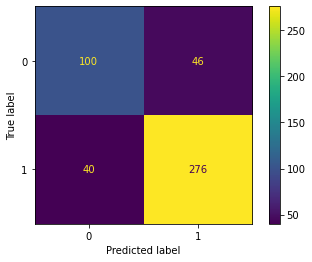

In [67]:
nnaccuracy=[]
nnprecision=[]
nnrecall=[]
nnf1score=[]
nnauc=[]

def NeuralNet():
    model = Sequential()
    model.add(Dense(63, input_shape=(6,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)
for train_index, test_index in cv.split(X,y_label):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_label[train_index], y_label[test_index]
    
    nn = KerasClassifier(build_fn=NeuralNet)   #create the NN model
    nn.fit(X_train, y_train)                   #train the model
    y_pred = nn.predict(X_test)                  # Predictions
    
    nnaccuracy.append(accuracy_score(y_pred, y_test))
    nnprecision.append(precision_score(y_pred, y_test))
    nnrecall.append(recall_score(y_pred, y_test))
    nnf1score.append(f1_score(y_pred, y_test))
    try:
        nnauc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval=['0','1']
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
    
print('Accuracy:', np.mean(nnaccuracy)*100)
print('Precision:', np.mean(nnprecision)*100)
print('Recall:', np.mean(nnrecall)*100)
print('f1_score:', np.mean(nnf1score)*100)
print('AUC:',np.mean(nnauc))

print('Standard deviation of accuracy: ', statistics.stdev(nnaccuracy))
print('Standard deviation of precision: ', statistics.stdev(nnprecision))
print('Standard deviation of recall: ', statistics.stdev(nnrecall))
print('Standard deviation of f1_score: ', statistics.stdev(nnf1score))

15/15 [==============================] - 0s 957us/step


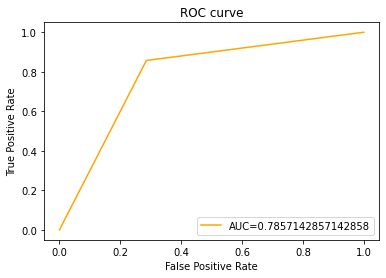

In [68]:
y_pred_proba = nn.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hyperparameter Tuning of neural network model

In [69]:
LeakyReLU = LeakyReLU(alpha=0.1)
pd.set_option("display.max_columns", None)
score_acc = make_scorer(accuracy_score)

In [70]:
#-----------------------------------------------------Bayesian Optimization--------------------------------------------------#
row, col=X.shape
l=[]
l.append([])
l.append([])
l.append([])
l.append([])
l.append([])
l.append([])
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=6, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    nm = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    model1 = nm
    model1.fit(X_train, y_train)
    y_score = model1.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l[1].append(accuracy_score(y_test, y_score)*100)
    l[2].append(precision_score(y_test, y_score)*100)
    l[3].append(f1_score(y_test, y_score)*100)
    l[4].append(recall_score(y_test, y_score)*100)
    l[5].append(roc_auc_score(y_test, y_score)*100)
    l[0].append(f)
    return l[0][0]

params_nn2 ={
    'neurons': (6, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.001, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=42)
nn_bo.maximize(init_points=10, n_iter=4)
start = time.time()

params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu','elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['dropout'] = round(params_nn_['dropout'])
params_nn_['dropout_rate'] = round(params_nn_['normalization'])
params_nn_['normalization'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
             'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]

print("Accuracy:", np.mean(l[1]))
print("Precision:", np.mean(l[2]))
print("F1-Score:" , np.mean(l[3]))
print("Recall:", np.mean(l[4])) 
print("AUC:", np.mean(l[5])) 
print('It takes %s minutes' % ((time.time() - start)/60))
print('-----------------------------------')
print('Best hyperparameters:')
params_nn_

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.7086    | 3.371     | 960.6     | 0.732     | 0.1796    | 32.48     | 1.312     | 1.116     | 0.8663    | 62.5      | 0.7081    | 0.1441    |
| 2         | 0.7086    | 8.729     | 866.0     | 0.2123    | 0.05455   | 34.67     | 1.608     | 2.05      | 0.4325    | 33.38     | 0.6119    | 0.9765    |
| 3         | 0.7086    | 2.629     | 493.1     | 0.4561    | 0.2356    | 35.97     | 2.028     | 2.185     | 0.0474    | 63.11     | 0.1705    | 0.4554    |
| 4         | 0.7086    | 8.54      | 972.5     | 0.8084    | 0.09138   | 27.81     | 2.368     | 1.88      | 0.1229    | 52.55     | 0.03439   | 6.365     |
| 5         | 0.7086    | 2.329     | 730.0     | 0.

{'activation': 'softsign',
 'batch_size': 961,
 'dropout': 1,
 'dropout_rate': 1,
 'epochs': 32,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.8663099696291603,
 'neurons': 63,
 'normalization': 1,
 'optimizer': <keras.optimizers.legacy.adam.Adam at 0x203ff85f190>}

9/9 [==============================] - 0s 998us/step


9/9 [==============================] - 0s 873us/step
Accuracy: 78.93884892086332
Precision: 88.55305779338384
Recall: 82.88227706245142
f1_score: 85.45542850470167
AUC: 0.7540584139981873
Standard deviation of accuracy:  0.03644185617279603
Standard deviation of precision:  0.030434627721141534
Standard deviation of recall:  0.051681311020966965
Standard deviation of f1_score:  0.02178935012308948
Standard deviation of AUC:  0.04312143742053775


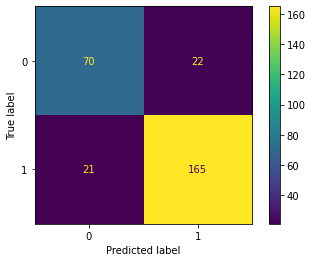

In [71]:
accuracy21=[]
precision=[]
recall=[]
f1score=[]
auc=[]

def NeuralNetbayesian():
    par=params_nn_
    activation=par['activation']
    batch_size=par['batch_size']
    dropout=par['dropout']
    dropout_rate=par['dropout_rate']
    epochs=par['epochs']
    layers1=par['layers1']
    layers2=par['layers2']
    learning_rate=par['learning_rate']
    neurons=par['neurons']
    normalization=par['normalization']
    optimizer=par['optimizer']

    model = Sequential()
    model.add(Dense(63, input_shape=(6,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kb = KerasClassifier(build_fn=NeuralNetbayesian)
    kb.fit(X_train, y_train)
    y_pred = kb.predict(X_test)
    
    accuracy21.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy21)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy21))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

9/9 [==============================] - 0s 998us/step


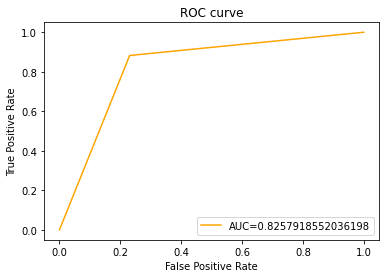

In [72]:
y_pred_proba = kb.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [73]:
#----------------------------------------------------------GridSearchCV-----------------------------------------------------#
# Function to create model
row,col=X.shape
best_params_list15=[]
ac_list15=[]

def create_model():
 # create model
    model = Sequential()
    model.add(Dense(63, input_shape=(6,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
 # Compile model
    model.compile(loss='binary_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size=(200, 1000)
epochs=(20, 100)
learn_rate=(0.001, 1)
optimizer=(0,7)
activation=(0, 9)
weight_constraint = (1.0, 2.0)
dropout_rate=(0,0.3) 
neurons=(6, 100)

start = time.time()

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer__learning_rate=learn_rate, optimizer=optimizer, optimizer__activation=activation,
                optimizer__dropout_rate=dropout_rate, optimizer__weight_constraint=weight_constraint, optimizer__neurons=neurons)

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y_label[training_indices]
    y_test=y_label[test_indices]
    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    best_params_list15.append(grid_result.best_params_)
    
    y_pred = grid.best_estimator_.predict(X_test)                                 # Predictions
    y_true = y_test                                                               # True values
    
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list15.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')
    
print('It takes %s minutes' % ((time.time() - start)/60))
print()

Best: 0.824915 using {'batch_size': 200, 'epochs': 100, 'optimizer': 0, 'optimizer__activation': 0, 'optimizer__dropout_rate': 0, 'optimizer__learning_rate': 0.001, 'optimizer__neurons': 6, 'optimizer__weight_constraint': 1.0}
Test accuracy: 76.61870503597122
Precision: 76.54867256637168
Recall: 93.51351351351352
F1 score: 84.18491484184915
AUC score: 0.6826213310084277
------------------------------------------------------------------------------------------------------------------
Best: 0.827608 using {'batch_size': 200, 'epochs': 100, 'optimizer': 0, 'optimizer__activation': 0, 'optimizer__dropout_rate': 0, 'optimizer__learning_rate': 0.001, 'optimizer__neurons': 6, 'optimizer__weight_constraint': 1.0}
Test accuracy: 78.05755395683454
Precision: 86.15384615384616
Recall: 83.16831683168317
F1 score: 84.63476070528966
AUC score: 0.7382100052110474
------------------------------------------------------------------------------------------------------------------
Best: 0.815894 using {'b

35/35 [==============================] - 0s 1ms/step - loss: 0.5276 - accuracy: 0.7347


9/9 [==============================] - 0s 873us/step
Accuracy: 79.8021582733813
Precision: 88.55877517494098
Recall: 83.78120209254327
f1_score: 85.9642193590022
AUC: 0.765301161852221
Standard deviation of accuracy:  0.032634961433820366
Standard deviation of precision:  0.03227568003743635
Standard deviation of recall:  0.045536398490342224
Standard deviation of f1_score:  0.020896479645343365
Standard deviation of AUC:  0.03571749950991182


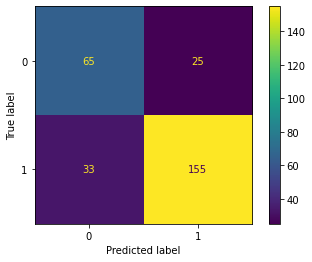

In [74]:
accuracy22=[]
precision=[]
recall=[]
f1score=[]
auc=[]


def NeuralNetgrid():
    par=best_params_list15[ac_list15.index(max(ac_list15))]
    batch_size=par['batch_size']
    epochs=par['epochs']
    optimizer=par['optimizer']
    optimizer__activation=par['optimizer__activation']
    optimizer__dropout_rate=par['optimizer__dropout_rate']
    optimizer__learning_rate=par['optimizer__learning_rate']
    optimizer__neurons=par['optimizer__neurons']
    optimizer__weight_constraint=par['optimizer__weight_constraint']

    model = Sequential()
    model.add(Dense(63, input_shape=(6,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kg = KerasClassifier(build_fn=NeuralNetgrid)
    kg.fit(X_train, y_train)
    y_pred = kg.predict(X_test)
    
    accuracy22.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy22)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy22))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

9/9 [==============================] - 0s 998us/step


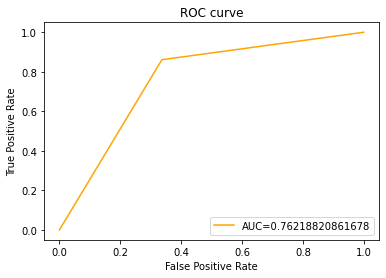

In [75]:
y_pred_proba = kg.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [76]:
#-----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
# Function to create model
best_params_list16=[]
ac_list16=[]

def create_model():
 # create model
    model = Sequential()
    model.add(Dense(63, input_shape=(6,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
 # Compile model
    model.compile(loss='binary_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the random search parameters
batch_size:(200, 1000)
epochs:(20, 100)
learn_rate:(0.001, 1)
optimizer:(0,7)
activation:(0, 9)
weight_constraint = (1.0, 2.0)
dropout_rate:(0,0.3) 
neurons: (6, 100)

start = time.time()
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer__learning_rate=learn_rate, optimizer=optimizer, optimizer__activation=activation,
                optimizer__dropout_rate=dropout_rate, optimizer__weight_constraint=weight_constraint, optimizer__neurons=neurons)

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y_label[training_indices]
    y_test=y_label[test_indices]
    rndm = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
    rndm_result = rndm.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (rndm_result.best_score_, rndm_result.best_params_))
    means = rndm_result.cv_results_['mean_test_score']
    stds = rndm_result.cv_results_['std_test_score']
    params = rndm_result.cv_results_['params']
    best_params_list16.append(rndm_result.best_params_)
    
    y_pred = rndm.best_estimator_.predict(X_test)  # Predictions
    y_true = y_test                                # True values
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list16.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')

print('It takes %s minutes' % ((time.time() - start)/60))

Best: 0.815874 using {'optimizer__weight_constraint': 1.0, 'optimizer__neurons': 100, 'optimizer__learning_rate': 1, 'optimizer__dropout_rate': 0, 'optimizer__activation': 0, 'optimizer': 0, 'epochs': 100, 'batch_size': 200}
Test accuracy: 82.73381294964028
Precision: 89.74358974358975
Recall: 86.20689655172413
F1 score: 87.9396984924623
AUC score: 0.7977011494252874
------------------------------------------------------------------------------------------------------------------
Best: 0.815874 using {'optimizer__weight_constraint': 2.0, 'optimizer__neurons': 100, 'optimizer__learning_rate': 0.001, 'optimizer__dropout_rate': 0.3, 'optimizer__activation': 9, 'optimizer': 7, 'epochs': 100, 'batch_size': 200}
Test accuracy: 82.73381294964028
Precision: 88.04347826086956
Recall: 86.17021276595744
F1 score: 87.0967741935484
AUC score: 0.808628841607565
------------------------------------------------------------------------------------------------------------------
Best: 0.814068 using {'op

35/35 [==============================] - 0s 1ms/step - loss: 0.5392 - accuracy: 0.7193


9/9 [==============================] - 0s 938us/step
Accuracy: 79.26618705035972
Precision: 88.49820291501311
Recall: 83.2073950873883
f1_score: 85.61744667078763
AUC: 0.7597903381390807
Standard deviation of accuracy:  0.032033264652495314
Standard deviation of precision:  0.032707982146653915
Standard deviation of recall:  0.04777255813905658
Standard deviation of f1_score:  0.020740789376260935
Standard deviation of AUC:  0.03639370454829465


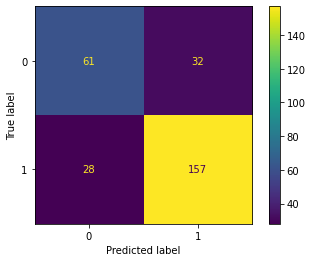

In [77]:
accuracy23=[]
precision=[]
recall=[]
f1score=[]
auc=[]


def NeuralNetrandom():
    par=best_params_list16[ac_list16.index(max(ac_list16))]
    batch_size=par['batch_size']
    epochs=par['epochs']
    optimizer=par['optimizer']
    optimizer__activation=par['optimizer__activation']
    optimizer__dropout_rate=par['optimizer__dropout_rate']
    optimizer__learning_rate=par['optimizer__learning_rate']
    optimizer__neurons=par['optimizer__neurons']
    optimizer__weight_constraint=par['optimizer__weight_constraint']

    model = Sequential()
    model.add(Dense(63, input_shape=(6,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kr = KerasClassifier(build_fn=NeuralNetrandom)
    kr.fit(X_train, y_train)
    y_pred = kr.predict(X_test)
    
    accuracy23.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass
    
listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()  

print('Accuracy:', np.mean(accuracy23)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy23))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

9/9 [==============================] - 0s 1ms/step


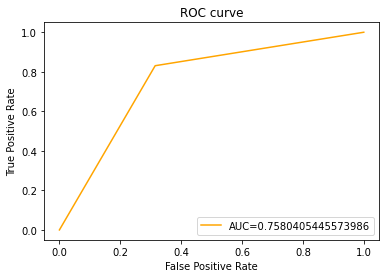

In [78]:
y_pred_proba = kr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## WILCOXON SIGNED RANK TEST

In [84]:
#-----------------------------------------------WILCOXON SIGNED RANK TEST------------------------------------------------------#
import random
ac_sv=[]
ac_rf=[]
ac_ab=[]
ac_gb=[]
ac_lg=[]
ac_nn=[]
row, col=X.shape

for i in range(5000):
    print(i)
    
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train_1=X.iloc[training_indices]
    X_test_1=X.iloc[test_indices]
    y_train_1=y[training_indices]
    y_test_1=y[test_indices]
    
    
    sv.fit(X_train_1, y_train_1)
    pred1= sv.predict(X_test_1)
    ac_sv.append(accuracy_score(y_test_1, pred1))
    
    rf.fit(X_train_1, y_train_1)
    pred2= rf.predict(X_test_1)
    ac_rf.append(accuracy_score(y_test_1, pred2))
    
    ab1.fit(X_train_1, y_train_1)
    pred3= ab1.predict(X_test_1)
    ac_ab.append(accuracy_score(y_test_1, pred3))
    
    gb1.fit(X_train_1, y_train_1)
    pred4= gb1.predict(X_test_1)
    ac_gb.append(accuracy_score(y_test_1, pred4))
    
    lr1.fit(X_train_1, y_train_1)
    pred5= lr1.predict(X_test_1)
    ac_lg.append(accuracy_score(y_test_1, pred5))
    
    kg.fit(X_train_1, y_train_1)
    pred6= kg.predict(X_test_1)
    ac_nn.append(accuracy_score(y_test_1, pred6))
    
alpha=0.05
stat,w1=stats.wilcoxon(ac_sv, ac_gb, zero_method='zsplit')
print(w1)
if(w1<alpha):
    print("reject null hypothesis-1")
stat,w2=stats.wilcoxon(ac_rf, ac_gb, zero_method='zsplit')
print(w2)
if(w2<alpha):
    print("reject null hypothesis-2")
stat,w3=stats.wilcoxon(ac_lg, ac_gb, zero_method='zsplit')
print(w3)
if(w3<alpha):
    print("reject null hypothesis-3")
stat,w4=stats.wilcoxon(ac_ab, ac_gb, zero_method='zsplit')
print(w4)
if(w4<alpha):
    print("reject null hypothesis-4")
stat,w5=stats.wilcoxon(ac_nn, ac_gb, zero_method='zsplit')
print(w5)
if(w5<alpha):
    print("reject null hypothesis-5")

0
9/9 [==============================] - 0s 998us/step
1
9/9 [==============================] - 0s 998us/step
2
9/9 [==============================] - 0s 1ms/step
3
9/9 [==============================] - 0s 996us/step
4
9/9 [==============================] - 0s 997us/step
5
9/9 [==============================] - 0s 998us/step
6
9/9 [==============================] - 0s 1ms/step
7
9/9 [==============================] - 0s 936us/step
8
9/9 [==============================] - 0s 1ms/step
9
9/9 [==============================] - 0s 1ms/step
10
9/9 [==============================] - 0s 1ms/step
11
9/9 [==============================] - 0s 908us/step
12
9/9 [==============================] - 0s 1ms/step
13
9/9 [==============================] - 0s 998us/step
14
9/9 [==============================] - 0s 997us/step
15
9/9 [==============================] - 0s 1ms/step
16
9/9 [==============================] - 0s 873us/step
17
9/9 [==============================] - 0s 1ms/step
18
9/9 [==========

9/9 [==============================] - 0s 1ms/step
58
9/9 [==============================] - 0s 997us/step
59
9/9 [==============================] - 0s 998us/step
60
9/9 [==============================] - 0s 1ms/step
61
9/9 [==============================] - 0s 888us/step
62
9/9 [==============================] - 0s 995us/step
63
9/9 [==============================] - 0s 1ms/step
64
9/9 [==============================] - 0s 998us/step
65
9/9 [==============================] - 0s 998us/step
66
9/9 [==============================] - 0s 1ms/step
67
9/9 [==============================] - 0s 812us/step
68
9/9 [==============================] - 0s 998us/step
69
9/9 [==============================] - 0s 999us/step
70
9/9 [==============================] - 0s 873us/step
71
9/9 [==============================] - 0s 998us/step
72
9/9 [==============================] - 0s 997us/step
73
9/9 [==============================] - 0s 873us/step
74
9/9 [==============================] - 0s 999us/step
75


9/9 [==============================] - 0s 2ms/step
116
9/9 [==============================] - 0s 872us/step
117
9/9 [==============================] - 0s 1ms/step
118
9/9 [==============================] - 0s 937us/step
119
9/9 [==============================] - 0s 998us/step
120
9/9 [==============================] - 0s 1ms/step
121
9/9 [==============================] - 0s 875us/step
122
9/9 [==============================] - 0s 936us/step
123
9/9 [==============================] - 0s 1ms/step
124
9/9 [==============================] - 0s 1ms/step
125
9/9 [==============================] - 0s 998us/step
126
9/9 [==============================] - 0s 995us/step
127
9/9 [==============================] - 0s 998us/step
128
9/9 [==============================] - 0s 1ms/step
129
9/9 [==============================] - 0s 997us/step
130
9/9 [==============================] - 0s 1ms/step
131
9/9 [==============================] - 0s 1ms/step
132
9/9 [==============================] - 0s 1ms/s

9/9 [==============================] - 0s 998us/step
173
9/9 [==============================] - 0s 1ms/step
174
9/9 [==============================] - 0s 1ms/step
175
9/9 [==============================] - 0s 998us/step
176
9/9 [==============================] - 0s 997us/step
177
9/9 [==============================] - 0s 1ms/step
178
9/9 [==============================] - 0s 1ms/step
179
9/9 [==============================] - 0s 998us/step
180
9/9 [==============================] - 0s 997us/step
181
9/9 [==============================] - 0s 998us/step
182
9/9 [==============================] - 0s 997us/step
183
9/9 [==============================] - 0s 1ms/step
184
9/9 [==============================] - 0s 1ms/step
185
9/9 [==============================] - 0s 873us/step
186
9/9 [==============================] - 0s 998us/step
187
9/9 [==============================] - 0s 873us/step
188
9/9 [==============================] - 0s 1ms/step
189
9/9 [==============================] - 0s 873

9/9 [==============================] - 0s 998us/step
230
9/9 [==============================] - 0s 1ms/step
231
9/9 [==============================] - 0s 1ms/step
232
9/9 [==============================] - 0s 1ms/step
233
9/9 [==============================] - 0s 994us/step
234
9/9 [==============================] - 0s 876us/step
235
9/9 [==============================] - 0s 1ms/step
236
9/9 [==============================] - 0s 873us/step
237
9/9 [==============================] - 0s 998us/step
238
9/9 [==============================] - 0s 999us/step
239
9/9 [==============================] - 0s 998us/step
240
9/9 [==============================] - 0s 997us/step
241
9/9 [==============================] - 0s 996us/step
242
9/9 [==============================] - 0s 998us/step
243
9/9 [==============================] - 0s 998us/step
244
9/9 [==============================] - 0s 1ms/step
245
9/9 [==============================] - 0s 997us/step
246
9/9 [==============================] - 0s

9/9 [==============================] - 0s 1ms/step
287
9/9 [==============================] - 0s 1ms/step
288
9/9 [==============================] - 0s 1ms/step
289
9/9 [==============================] - 0s 998us/step
290
9/9 [==============================] - 0s 1ms/step
291
9/9 [==============================] - 0s 873us/step
292
9/9 [==============================] - 0s 936us/step
293
9/9 [==============================] - 0s 998us/step
294
9/9 [==============================] - 0s 1ms/step
295
9/9 [==============================] - 0s 2ms/step
296
9/9 [==============================] - 0s 873us/step
297
9/9 [==============================] - 0s 1ms/step
298
9/9 [==============================] - 0s 1ms/step
299
9/9 [==============================] - 0s 997us/step
300
9/9 [==============================] - 0s 1ms/step
301
9/9 [==============================] - 0s 997us/step
302
9/9 [==============================] - 0s 1ms/step
303
9/9 [==============================] - 0s 998us/ste

9/9 [==============================] - 0s 1ms/step
344
9/9 [==============================] - 0s 873us/step
345
9/9 [==============================] - 0s 999us/step
346
9/9 [==============================] - 0s 1000us/step
347
9/9 [==============================] - 0s 998us/step
348
9/9 [==============================] - 0s 1ms/step
349
9/9 [==============================] - 0s 998us/step
350
9/9 [==============================] - 0s 998us/step
351
9/9 [==============================] - 0s 1ms/step
352
9/9 [==============================] - 0s 998us/step
353
9/9 [==============================] - 0s 997us/step
354
9/9 [==============================] - 0s 1ms/step
355
9/9 [==============================] - 0s 998us/step
356
9/9 [==============================] - 0s 1ms/step
357
9/9 [==============================] - 0s 1ms/step
358
9/9 [==============================] - 0s 1ms/step
359
9/9 [==============================] - 0s 812us/step
360
9/9 [==============================] - 0s 99

9/9 [==============================] - 0s 873us/step
401
9/9 [==============================] - 0s 1ms/step
402
9/9 [==============================] - 0s 1ms/step
403
9/9 [==============================] - 0s 1ms/step
404
9/9 [==============================] - 0s 997us/step
405
9/9 [==============================] - 0s 1ms/step
406
9/9 [==============================] - 0s 998us/step
407
9/9 [==============================] - 0s 1ms/step
408
9/9 [==============================] - 0s 998us/step
409
9/9 [==============================] - 0s 873us/step
410
9/9 [==============================] - 0s 998us/step
411
9/9 [==============================] - 0s 873us/step
412
9/9 [==============================] - 0s 1ms/step
413
9/9 [==============================] - 0s 1ms/step
414
9/9 [==============================] - 0s 1ms/step
415
9/9 [==============================] - 0s 998us/step
416
9/9 [==============================] - 0s 1ms/step
417
9/9 [==============================] - 0s 1ms/ste

9/9 [==============================] - 0s 1ms/step
458
9/9 [==============================] - 0s 1ms/step
459
9/9 [==============================] - 0s 873us/step
460
9/9 [==============================] - 0s 1ms/step
461
9/9 [==============================] - 0s 987us/step
462
9/9 [==============================] - 0s 873us/step
463
9/9 [==============================] - 0s 998us/step
464
9/9 [==============================] - 0s 928us/step
465
9/9 [==============================] - 0s 873us/step
466
9/9 [==============================] - 0s 998us/step
467
9/9 [==============================] - 0s 999us/step
468
9/9 [==============================] - 0s 1ms/step
469
9/9 [==============================] - 0s 995us/step
470
9/9 [==============================] - 0s 998us/step
471
9/9 [==============================] - 0s 1ms/step
472
9/9 [==============================] - 0s 1ms/step
473
9/9 [==============================] - 0s 995us/step
474
9/9 [==============================] - 0s 8

9/9 [==============================] - 0s 1ms/step
515
9/9 [==============================] - 0s 997us/step
516
9/9 [==============================] - 0s 1ms/step
517
9/9 [==============================] - 0s 1ms/step
518
9/9 [==============================] - 0s 993us/step
519
9/9 [==============================] - 0s 874us/step
520
9/9 [==============================] - 0s 998us/step
521
9/9 [==============================] - 0s 998us/step
522
9/9 [==============================] - 0s 873us/step
523
9/9 [==============================] - 0s 873us/step
524
9/9 [==============================] - 0s 875us/step
525
9/9 [==============================] - 0s 996us/step
526
9/9 [==============================] - 0s 997us/step
527
9/9 [==============================] - 0s 873us/step
528
9/9 [==============================] - 0s 998us/step
529
9/9 [==============================] - 0s 1000us/step
530
9/9 [==============================] - 0s 871us/step
531
9/9 [==============================]

9/9 [==============================] - 0s 997us/step
572
9/9 [==============================] - 0s 998us/step
573
9/9 [==============================] - 0s 1ms/step
574
9/9 [==============================] - 0s 998us/step
575
9/9 [==============================] - 0s 998us/step
576
9/9 [==============================] - 0s 1ms/step
577
9/9 [==============================] - 0s 1ms/step
578
9/9 [==============================] - 0s 1ms/step
579
9/9 [==============================] - 0s 873us/step
580
9/9 [==============================] - 0s 1ms/step
581
9/9 [==============================] - 0s 1ms/step
582
9/9 [==============================] - 0s 1ms/step
583
9/9 [==============================] - 0s 1ms/step
584
9/9 [==============================] - 0s 1ms/step
585
9/9 [==============================] - 0s 999us/step
586
9/9 [==============================] - 0s 938us/step
587
9/9 [==============================] - 0s 1ms/step
588
9/9 [==============================] - 0s 936us/ste

628
9/9 [==============================] - 0s 748us/step
629
9/9 [==============================] - 0s 748us/step
630
9/9 [==============================] - 0s 748us/step
631
9/9 [==============================] - 0s 748us/step
632
9/9 [==============================] - 0s 750us/step
633
9/9 [==============================] - 0s 791us/step
634
9/9 [==============================] - 0s 624us/step
635
9/9 [==============================] - 0s 748us/step
636
9/9 [==============================] - 0s 748us/step
637
9/9 [==============================] - 0s 818us/step
638
9/9 [==============================] - 0s 643us/step
639
9/9 [==============================] - 0s 748us/step
640
9/9 [==============================] - 0s 693us/step
641
9/9 [==============================] - 0s 624us/step
642
9/9 [==============================] - 0s 624us/step
643
9/9 [==============================] - 0s 624us/step
644
9/9 [==============================] - 0s 624us/step
645
9/9 [======================

9/9 [==============================] - 0s 645us/step
685
9/9 [==============================] - 0s 624us/step
686
9/9 [==============================] - 0s 624us/step
687
9/9 [==============================] - 0s 687us/step
688
9/9 [==============================] - 0s 619us/step
689
9/9 [==============================] - 0s 642us/step
690
9/9 [==============================] - 0s 748us/step
691
9/9 [==============================] - 0s 563us/step
692
9/9 [==============================] - 0s 687us/step
693
9/9 [==============================] - 0s 624us/step
694
9/9 [==============================] - 0s 623us/step
695
9/9 [==============================] - 0s 624us/step
696
9/9 [==============================] - 0s 499us/step
697
9/9 [==============================] - 0s 624us/step
698
9/9 [==============================] - 0s 687us/step
699
9/9 [==============================] - 0s 624us/step
700
9/9 [==============================] - 0s 687us/step
701
9/9 [==========================

9/9 [==============================] - 0s 748us/step
741
9/9 [==============================] - 0s 687us/step
742
9/9 [==============================] - 0s 624us/step
743
9/9 [==============================] - 0s 687us/step
744
9/9 [==============================] - 0s 687us/step
745
9/9 [==============================] - 0s 624us/step
746
9/9 [==============================] - 0s 624us/step
747
9/9 [==============================] - 0s 624us/step
748
9/9 [==============================] - 0s 624us/step
749
9/9 [==============================] - 0s 624us/step
750
9/9 [==============================] - 0s 624us/step
751
9/9 [==============================] - 0s 748us/step
752
9/9 [==============================] - 0s 624us/step
753
9/9 [==============================] - 0s 624us/step
754
9/9 [==============================] - 0s 624us/step
755
9/9 [==============================] - 0s 624us/step
756
9/9 [==============================] - 0s 562us/step
757
9/9 [==========================

9/9 [==============================] - 0s 657us/step
797
9/9 [==============================] - 0s 623us/step
798
9/9 [==============================] - 0s 624us/step
799
9/9 [==============================] - 0s 748us/step
800
9/9 [==============================] - 0s 748us/step
801
9/9 [==============================] - 0s 624us/step
802
9/9 [==============================] - 0s 624us/step
803
9/9 [==============================] - 0s 624us/step
804
9/9 [==============================] - 0s 624us/step
805
9/9 [==============================] - 0s 565us/step
806
9/9 [==============================] - 0s 748us/step
807
9/9 [==============================] - 0s 624us/step
808
9/9 [==============================] - 0s 624us/step
809
9/9 [==============================] - 0s 624us/step
810
9/9 [==============================] - 0s 624us/step
811
9/9 [==============================] - 0s 748us/step
812
9/9 [==============================] - 0s 624us/step
813
9/9 [==========================

9/9 [==============================] - 0s 624us/step
853
9/9 [==============================] - 0s 623us/step
854
9/9 [==============================] - 0s 752us/step
855
9/9 [==============================] - 0s 624us/step
856
9/9 [==============================] - 0s 665us/step
857
9/9 [==============================] - 0s 748us/step
858
9/9 [==============================] - 0s 624us/step
859
9/9 [==============================] - 0s 696us/step
860
9/9 [==============================] - 0s 693us/step
861
9/9 [==============================] - 0s 624us/step
862
9/9 [==============================] - 0s 624us/step
863
9/9 [==============================] - 0s 748us/step
864
9/9 [==============================] - 0s 624us/step
865
9/9 [==============================] - 0s 623us/step
866
9/9 [==============================] - 0s 624us/step
867
9/9 [==============================] - 0s 624us/step
868
9/9 [==============================] - 0s 624us/step
869
9/9 [==========================

9/9 [==============================] - 0s 700us/step
909
9/9 [==============================] - 0s 666us/step
910
9/9 [==============================] - 0s 748us/step
911
9/9 [==============================] - 0s 624us/step
912
9/9 [==============================] - 0s 687us/step
913
9/9 [==============================] - 0s 624us/step
914
9/9 [==============================] - 0s 624us/step
915
9/9 [==============================] - 0s 561us/step
916
9/9 [==============================] - 0s 687us/step
917
9/9 [==============================] - 0s 624us/step
918
9/9 [==============================] - 0s 624us/step
919
9/9 [==============================] - 0s 623us/step
920
9/9 [==============================] - 0s 998us/step
921
9/9 [==============================] - 0s 624us/step
922
9/9 [==============================] - 0s 624us/step
923
9/9 [==============================] - 0s 624us/step
924
9/9 [==============================] - 0s 623us/step
925
9/9 [==========================

9/9 [==============================] - 0s 624us/step
965
9/9 [==============================] - 0s 624us/step
966
9/9 [==============================] - 0s 1ms/step
967
9/9 [==============================] - 0s 624us/step
968
9/9 [==============================] - 0s 696us/step
969
9/9 [==============================] - 0s 624us/step
970
9/9 [==============================] - 0s 624us/step
971
9/9 [==============================] - 0s 688us/step
972
9/9 [==============================] - 0s 748us/step
973
9/9 [==============================] - 0s 748us/step
974
9/9 [==============================] - 0s 624us/step
975
9/9 [==============================] - 0s 623us/step
976
9/9 [==============================] - 0s 687us/step
977
9/9 [==============================] - 0s 687us/step
978
9/9 [==============================] - 0s 748us/step
979
9/9 [==============================] - 0s 624us/step
980
9/9 [==============================] - 0s 815us/step
981
9/9 [============================

9/9 [==============================] - 0s 624us/step
1021
9/9 [==============================] - 0s 624us/step
1022
9/9 [==============================] - 0s 624us/step
1023
9/9 [==============================] - 0s 624us/step
1024
9/9 [==============================] - 0s 623us/step
1025
9/9 [==============================] - 0s 687us/step
1026
9/9 [==============================] - 0s 624us/step
1027
9/9 [==============================] - 0s 624us/step
1028
9/9 [==============================] - 0s 652us/step
1029
9/9 [==============================] - 0s 687us/step
1030
9/9 [==============================] - 0s 748us/step
1031
9/9 [==============================] - 0s 687us/step
1032
9/9 [==============================] - 0s 594us/step
1033
9/9 [==============================] - 0s 624us/step
1034
9/9 [==============================] - 0s 688us/step
1035
9/9 [==============================] - 0s 624us/step
1036
9/9 [==============================] - 0s 624us/step
1037
9/9 [=========

9/9 [==============================] - 0s 624us/step
1076
9/9 [==============================] - 0s 748us/step
1077
9/9 [==============================] - 0s 748us/step
1078
9/9 [==============================] - 0s 623us/step
1079
9/9 [==============================] - 0s 698us/step
1080
9/9 [==============================] - 0s 624us/step
1081
9/9 [==============================] - 0s 624us/step
1082
9/9 [==============================] - 0s 641us/step
1083
9/9 [==============================] - 0s 624us/step
1084
9/9 [==============================] - 0s 624us/step
1085
9/9 [==============================] - 0s 623us/step
1086
9/9 [==============================] - 0s 624us/step
1087
9/9 [==============================] - 0s 624us/step
1088
9/9 [==============================] - 0s 623us/step
1089
9/9 [==============================] - 0s 624us/step
1090
9/9 [==============================] - 0s 623us/step
1091
9/9 [==============================] - 0s 624us/step
1092
9/9 [=========

9/9 [==============================] - 0s 623us/step
1132
9/9 [==============================] - 0s 631us/step
1133
9/9 [==============================] - 0s 624us/step
1134
9/9 [==============================] - 0s 624us/step
1135
9/9 [==============================] - 0s 624us/step
1136
9/9 [==============================] - 0s 624us/step
1137
9/9 [==============================] - 0s 624us/step
1138
9/9 [==============================] - 0s 623us/step
1139
9/9 [==============================] - 0s 624us/step
1140
9/9 [==============================] - 0s 624us/step
1141
9/9 [==============================] - 0s 624us/step
1142
9/9 [==============================] - 0s 623us/step
1143
9/9 [==============================] - 0s 624us/step
1144
9/9 [==============================] - 0s 624us/step
1145
9/9 [==============================] - 0s 624us/step
1146
9/9 [==============================] - 0s 624us/step
1147
9/9 [==============================] - 0s 624us/step
1148
9/9 [=========

9/9 [==============================] - 0s 625us/step
1187
9/9 [==============================] - 0s 624us/step
1188
9/9 [==============================] - 0s 624us/step
1189
9/9 [==============================] - 0s 624us/step
1190
9/9 [==============================] - 0s 624us/step
1191
9/9 [==============================] - 0s 624us/step
1192
9/9 [==============================] - 0s 624us/step
1193
9/9 [==============================] - 0s 624us/step
1194
9/9 [==============================] - 0s 624us/step
1195
9/9 [==============================] - 0s 624us/step
1196
9/9 [==============================] - 0s 624us/step
1197
9/9 [==============================] - 0s 624us/step
1198
9/9 [==============================] - 0s 748us/step
1199
9/9 [==============================] - 0s 624us/step
1200
9/9 [==============================] - 0s 748us/step
1201
9/9 [==============================] - 0s 687us/step
1202
9/9 [==============================] - 0s 625us/step
1203
9/9 [=========

9/9 [==============================] - 0s 624us/step
1243
9/9 [==============================] - 0s 624us/step
1244
9/9 [==============================] - 0s 624us/step
1245
9/9 [==============================] - 0s 624us/step
1246
9/9 [==============================] - 0s 624us/step
1247
9/9 [==============================] - 0s 687us/step
1248
9/9 [==============================] - 0s 624us/step
1249
9/9 [==============================] - 0s 624us/step
1250
9/9 [==============================] - 0s 624us/step
1251
9/9 [==============================] - 0s 645us/step
1252
9/9 [==============================] - 0s 624us/step
1253
9/9 [==============================] - 0s 563us/step
1254
9/9 [==============================] - 0s 624us/step
1255
9/9 [==============================] - 0s 624us/step
1256
9/9 [==============================] - 0s 624us/step
1257
9/9 [==============================] - 0s 749us/step
1258
9/9 [==============================] - 0s 624us/step
1259
9/9 [=========

9/9 [==============================] - 0s 624us/step
1298
9/9 [==============================] - 0s 661us/step
1299
9/9 [==============================] - 0s 624us/step
1300
9/9 [==============================] - 0s 624us/step
1301
9/9 [==============================] - 0s 688us/step
1302
9/9 [==============================] - 0s 624us/step
1303
9/9 [==============================] - 0s 624us/step
1304
9/9 [==============================] - 0s 624us/step
1305
9/9 [==============================] - 0s 624us/step
1306
9/9 [==============================] - 0s 748us/step
1307
9/9 [==============================] - 0s 624us/step
1308
9/9 [==============================] - 0s 624us/step
1309
9/9 [==============================] - 0s 624us/step
1310
9/9 [==============================] - 0s 624us/step
1311
9/9 [==============================] - 0s 687us/step
1312
9/9 [==============================] - 0s 748us/step
1313
9/9 [==============================] - 0s 624us/step
1314
9/9 [=========

9/9 [==============================] - 0s 749us/step
1354
9/9 [==============================] - 0s 624us/step
1355
9/9 [==============================] - 0s 687us/step
1356
9/9 [==============================] - 0s 624us/step
1357
9/9 [==============================] - 0s 748us/step
1358
9/9 [==============================] - 0s 597us/step
1359
9/9 [==============================] - 0s 748us/step
1360
9/9 [==============================] - 0s 626us/step
1361
9/9 [==============================] - 0s 624us/step
1362
9/9 [==============================] - 0s 624us/step
1363
9/9 [==============================] - 0s 623us/step
1364
9/9 [==============================] - 0s 748us/step
1365
9/9 [==============================] - 0s 624us/step
1366
9/9 [==============================] - 0s 691us/step
1367
9/9 [==============================] - 0s 624us/step
1368
9/9 [==============================] - 0s 623us/step
1369
9/9 [==============================] - 0s 624us/step
1370
9/9 [=========

9/9 [==============================] - 0s 624us/step
1409
9/9 [==============================] - 0s 623us/step
1410
9/9 [==============================] - 0s 562us/step
1411
9/9 [==============================] - 0s 624us/step
1412
9/9 [==============================] - 0s 624us/step
1413
9/9 [==============================] - 0s 624us/step
1414
9/9 [==============================] - 0s 749us/step
1415
9/9 [==============================] - 0s 624us/step
1416
9/9 [==============================] - 0s 499us/step
1417
9/9 [==============================] - 0s 687us/step
1418
9/9 [==============================] - 0s 624us/step
1419
9/9 [==============================] - 0s 624us/step
1420
9/9 [==============================] - 0s 624us/step
1421
9/9 [==============================] - 0s 544us/step
1422
9/9 [==============================] - 0s 623us/step
1423
9/9 [==============================] - 0s 624us/step
1424
9/9 [==============================] - 0s 624us/step
1425
9/9 [=========

9/9 [==============================] - 0s 688us/step
1465
9/9 [==============================] - 0s 624us/step
1466
9/9 [==============================] - 0s 624us/step
1467
9/9 [==============================] - 0s 624us/step
1468
9/9 [==============================] - 0s 624us/step
1469
9/9 [==============================] - 0s 624us/step
1470
9/9 [==============================] - 0s 748us/step
1471
9/9 [==============================] - 0s 624us/step
1472
9/9 [==============================] - 0s 562us/step
1473
9/9 [==============================] - 0s 624us/step
1474
9/9 [==============================] - 0s 748us/step
1475
9/9 [==============================] - 0s 691us/step
1476
9/9 [==============================] - 0s 701us/step
1477
9/9 [==============================] - 0s 687us/step
1478
9/9 [==============================] - 0s 624us/step
1479
9/9 [==============================] - 0s 624us/step
1480
9/9 [==============================] - 0s 624us/step
1481
9/9 [=========

9/9 [==============================] - 0s 624us/step
1520
9/9 [==============================] - 0s 536us/step
1521
9/9 [==============================] - 0s 624us/step
1522
9/9 [==============================] - 0s 624us/step
1523
9/9 [==============================] - 0s 623us/step
1524
9/9 [==============================] - 0s 691us/step
1525
9/9 [==============================] - 0s 624us/step
1526
9/9 [==============================] - 0s 624us/step
1527
9/9 [==============================] - 0s 623us/step
1528
9/9 [==============================] - 0s 624us/step
1529
9/9 [==============================] - 0s 624us/step
1530
9/9 [==============================] - 0s 624us/step
1531
9/9 [==============================] - 0s 748us/step
1532
9/9 [==============================] - 0s 624us/step
1533
9/9 [==============================] - 0s 748us/step
1534
9/9 [==============================] - 0s 624us/step
1535
9/9 [==============================] - 0s 624us/step
1536
9/9 [=========

9/9 [==============================] - 0s 624us/step
1576
9/9 [==============================] - 0s 624us/step
1577
9/9 [==============================] - 0s 699us/step
1578
9/9 [==============================] - 0s 684us/step
1579
9/9 [==============================] - 0s 624us/step
1580
9/9 [==============================] - 0s 623us/step
1581
9/9 [==============================] - 0s 748us/step
1582
9/9 [==============================] - 0s 684us/step
1583
9/9 [==============================] - 0s 624us/step
1584
9/9 [==============================] - 0s 624us/step
1585
9/9 [==============================] - 0s 624us/step
1586
9/9 [==============================] - 0s 624us/step
1587
9/9 [==============================] - 0s 624us/step
1588
9/9 [==============================] - 0s 624us/step
1589
9/9 [==============================] - 0s 624us/step
1590
9/9 [==============================] - 0s 624us/step
1591
9/9 [==============================] - 0s 772us/step
1592
9/9 [=========

9/9 [==============================] - 0s 624us/step
1631
9/9 [==============================] - 0s 624us/step
1632
9/9 [==============================] - 0s 624us/step
1633
9/9 [==============================] - 0s 656us/step
1634
9/9 [==============================] - 0s 624us/step
1635
9/9 [==============================] - 0s 624us/step
1636
9/9 [==============================] - 0s 624us/step
1637
9/9 [==============================] - 0s 691us/step
1638
9/9 [==============================] - 0s 688us/step
1639
9/9 [==============================] - 0s 624us/step
1640
9/9 [==============================] - 0s 624us/step
1641
9/9 [==============================] - 0s 687us/step
1642
9/9 [==============================] - 0s 624us/step
1643
9/9 [==============================] - 0s 624us/step
1644
9/9 [==============================] - 0s 624us/step
1645
9/9 [==============================] - 0s 624us/step
1646
9/9 [==============================] - 0s 687us/step
1647
9/9 [=========

9/9 [==============================] - 0s 748us/step
1687
9/9 [==============================] - 0s 624us/step
1688
9/9 [==============================] - 0s 748us/step
1689
9/9 [==============================] - 0s 688us/step
1690
9/9 [==============================] - 0s 624us/step
1691
9/9 [==============================] - 0s 748us/step
1692
9/9 [==============================] - 0s 624us/step
1693
9/9 [==============================] - 0s 748us/step
1694
9/9 [==============================] - 0s 624us/step
1695
9/9 [==============================] - 0s 624us/step
1696
9/9 [==============================] - 0s 624us/step
1697
9/9 [==============================] - 0s 624us/step
1698
9/9 [==============================] - 0s 623us/step
1699
9/9 [==============================] - 0s 624us/step
1700
9/9 [==============================] - 0s 624us/step
1701
9/9 [==============================] - 0s 624us/step
1702
9/9 [==============================] - 0s 749us/step
1703
9/9 [=========

9/9 [==============================] - 0s 624us/step
1742
9/9 [==============================] - 0s 671us/step
1743
9/9 [==============================] - 0s 624us/step
1744
9/9 [==============================] - 0s 687us/step
1745
9/9 [==============================] - 0s 748us/step
1746
9/9 [==============================] - 0s 624us/step
1747
9/9 [==============================] - 0s 562us/step
1748
9/9 [==============================] - 0s 624us/step
1749
9/9 [==============================] - 0s 624us/step
1750
9/9 [==============================] - 0s 624us/step
1751
9/9 [==============================] - 0s 687us/step
1752
9/9 [==============================] - 0s 624us/step
1753
9/9 [==============================] - 0s 659us/step
1754
9/9 [==============================] - 0s 623us/step
1755
9/9 [==============================] - 0s 624us/step
1756
9/9 [==============================] - 0s 624us/step
1757
9/9 [==============================] - 0s 624us/step
1758
9/9 [=========

9/9 [==============================] - 0s 612us/step
1798
9/9 [==============================] - 0s 624us/step
1799
9/9 [==============================] - 0s 624us/step
1800
9/9 [==============================] - 0s 624us/step
1801
9/9 [==============================] - 0s 624us/step
1802
9/9 [==============================] - 0s 624us/step
1803
9/9 [==============================] - 0s 624us/step
1804
9/9 [==============================] - 0s 623us/step
1805
9/9 [==============================] - 0s 624us/step
1806
9/9 [==============================] - 0s 748us/step
1807
9/9 [==============================] - 0s 623us/step
1808
9/9 [==============================] - 0s 624us/step
1809
9/9 [==============================] - 0s 624us/step
1810
9/9 [==============================] - 0s 624us/step
1811
9/9 [==============================] - 0s 624us/step
1812
9/9 [==============================] - 0s 624us/step
1813
9/9 [==============================] - 0s 624us/step
1814
9/9 [=========

9/9 [==============================] - 0s 624us/step
1853
9/9 [==============================] - 0s 688us/step
1854
9/9 [==============================] - 0s 624us/step
1855
9/9 [==============================] - 0s 624us/step
1856
9/9 [==============================] - 0s 624us/step
1857
9/9 [==============================] - 0s 687us/step
1858
9/9 [==============================] - 0s 748us/step
1859
9/9 [==============================] - 0s 624us/step
1860
9/9 [==============================] - 0s 623us/step
1861
9/9 [==============================] - 0s 687us/step
1862
9/9 [==============================] - 0s 624us/step
1863
9/9 [==============================] - 0s 634us/step
1864
9/9 [==============================] - 0s 624us/step
1865
9/9 [==============================] - 0s 624us/step
1866
9/9 [==============================] - 0s 624us/step
1867
9/9 [==============================] - 0s 687us/step
1868
9/9 [==============================] - 0s 624us/step
1869
9/9 [=========

9/9 [==============================] - 0s 748us/step
1909
9/9 [==============================] - 0s 708us/step
1910
9/9 [==============================] - 0s 624us/step
1911
9/9 [==============================] - 0s 623us/step
1912
9/9 [==============================] - 0s 624us/step
1913
9/9 [==============================] - 0s 749us/step
1914
9/9 [==============================] - 0s 688us/step
1915
9/9 [==============================] - 0s 624us/step
1916
9/9 [==============================] - 0s 624us/step
1917
9/9 [==============================] - 0s 624us/step
1918
9/9 [==============================] - 0s 624us/step
1919
9/9 [==============================] - 0s 624us/step
1920
9/9 [==============================] - 0s 624us/step
1921
9/9 [==============================] - 0s 624us/step
1922
9/9 [==============================] - 0s 748us/step
1923
9/9 [==============================] - 0s 623us/step
1924
9/9 [==============================] - 0s 623us/step
1925
9/9 [=========

9/9 [==============================] - 0s 624us/step
1964
9/9 [==============================] - 0s 748us/step
1965
9/9 [==============================] - 0s 633us/step
1966
9/9 [==============================] - 0s 748us/step
1967
9/9 [==============================] - 0s 623us/step
1968
9/9 [==============================] - 0s 748us/step
1969
9/9 [==============================] - 0s 624us/step
1970
9/9 [==============================] - 0s 624us/step
1971
9/9 [==============================] - 0s 689us/step
1972
9/9 [==============================] - 0s 624us/step
1973
9/9 [==============================] - 0s 624us/step
1974
9/9 [==============================] - 0s 624us/step
1975
9/9 [==============================] - 0s 748us/step
1976
9/9 [==============================] - 0s 624us/step
1977
9/9 [==============================] - 0s 599us/step
1978
9/9 [==============================] - 0s 624us/step
1979
9/9 [==============================] - 0s 748us/step
1980
9/9 [=========

9/9 [==============================] - 0s 748us/step
2020
9/9 [==============================] - 0s 623us/step
2021
9/9 [==============================] - 0s 749us/step
2022
9/9 [==============================] - 0s 812us/step
2023
9/9 [==============================] - 0s 748us/step
2024
9/9 [==============================] - 0s 754us/step
2025
9/9 [==============================] - 0s 626us/step
2026
9/9 [==============================] - 0s 624us/step
2027
9/9 [==============================] - 0s 624us/step
2028
9/9 [==============================] - 0s 748us/step
2029
9/9 [==============================] - 0s 624us/step
2030
9/9 [==============================] - 0s 624us/step
2031
9/9 [==============================] - 0s 748us/step
2032
9/9 [==============================] - 0s 608us/step
2033
9/9 [==============================] - 0s 624us/step
2034
9/9 [==============================] - 0s 748us/step
2035
9/9 [==============================] - 0s 624us/step
2036
9/9 [=========

9/9 [==============================] - 0s 624us/step
2075
9/9 [==============================] - 0s 624us/step
2076
9/9 [==============================] - 0s 623us/step
2077
9/9 [==============================] - 0s 623us/step
2078
9/9 [==============================] - 0s 687us/step
2079
9/9 [==============================] - 0s 636us/step
2080
9/9 [==============================] - 0s 624us/step
2081
9/9 [==============================] - 0s 689us/step
2082
9/9 [==============================] - 0s 624us/step
2083
9/9 [==============================] - 0s 624us/step
2084
9/9 [==============================] - 0s 624us/step
2085
9/9 [==============================] - 0s 624us/step
2086
9/9 [==============================] - 0s 641us/step
2087
9/9 [==============================] - 0s 624us/step
2088
9/9 [==============================] - 0s 611us/step
2089
9/9 [==============================] - 0s 748us/step
2090
9/9 [==============================] - 0s 748us/step
2091
9/9 [=========

9/9 [==============================] - 0s 688us/step
2131
9/9 [==============================] - 0s 623us/step
2132
9/9 [==============================] - 0s 624us/step
2133
9/9 [==============================] - 0s 750us/step
2134
9/9 [==============================] - 0s 685us/step
2135
9/9 [==============================] - 0s 623us/step
2136
9/9 [==============================] - 0s 748us/step
2137
9/9 [==============================] - 0s 624us/step
2138
9/9 [==============================] - 0s 624us/step
2139
9/9 [==============================] - 0s 748us/step
2140
9/9 [==============================] - 0s 749us/step
2141
9/9 [==============================] - 0s 624us/step
2142
9/9 [==============================] - 0s 624us/step
2143
9/9 [==============================] - 0s 624us/step
2144
9/9 [==============================] - 0s 624us/step
2145
9/9 [==============================] - 0s 624us/step
2146
9/9 [==============================] - 0s 624us/step
2147
9/9 [=========

9/9 [==============================] - 0s 624us/step
2186
9/9 [==============================] - 0s 624us/step
2187
9/9 [==============================] - 0s 624us/step
2188
9/9 [==============================] - 0s 624us/step
2189
9/9 [==============================] - 0s 624us/step
2190
9/9 [==============================] - 0s 688us/step
2191
9/9 [==============================] - 0s 624us/step
2192
9/9 [==============================] - 0s 623us/step
2193
9/9 [==============================] - 0s 624us/step
2194
9/9 [==============================] - 0s 624us/step
2195
9/9 [==============================] - 0s 624us/step
2196
9/9 [==============================] - 0s 748us/step
2197
9/9 [==============================] - 0s 599us/step
2198
9/9 [==============================] - 0s 624us/step
2199
9/9 [==============================] - 0s 687us/step
2200
9/9 [==============================] - 0s 624us/step
2201
9/9 [==============================] - 0s 624us/step
2202
9/9 [=========

9/9 [==============================] - 0s 692us/step
2242
9/9 [==============================] - 0s 748us/step
2243
9/9 [==============================] - 0s 624us/step
2244
9/9 [==============================] - 0s 691us/step
2245
9/9 [==============================] - 0s 623us/step
2246
9/9 [==============================] - 0s 624us/step
2247
9/9 [==============================] - 0s 624us/step
2248
9/9 [==============================] - 0s 687us/step
2249
9/9 [==============================] - 0s 624us/step
2250
9/9 [==============================] - 0s 623us/step
2251
9/9 [==============================] - 0s 624us/step
2252
9/9 [==============================] - 0s 624us/step
2253
9/9 [==============================] - 0s 624us/step
2254
9/9 [==============================] - 0s 624us/step
2255
9/9 [==============================] - 0s 624us/step
2256
9/9 [==============================] - 0s 623us/step
2257
9/9 [==============================] - 0s 597us/step
2258
9/9 [=========

9/9 [==============================] - 0s 647us/step
2297
9/9 [==============================] - 0s 748us/step
2298
9/9 [==============================] - 0s 624us/step
2299
9/9 [==============================] - 0s 810us/step
2300
9/9 [==============================] - 0s 748us/step
2301
9/9 [==============================] - 0s 873us/step
2302
9/9 [==============================] - 0s 873us/step
2303
9/9 [==============================] - 0s 748us/step
2304
9/9 [==============================] - 0s 813us/step
2305
9/9 [==============================] - 0s 624us/step
2306
9/9 [==============================] - 0s 748us/step
2307
9/9 [==============================] - 0s 797us/step
2308
9/9 [==============================] - 0s 748us/step
2309
9/9 [==============================] - 0s 624us/step
2310
9/9 [==============================] - 0s 624us/step
2311
9/9 [==============================] - 0s 687us/step
2312
9/9 [==============================] - 0s 725us/step
2313
9/9 [=========

9/9 [==============================] - 0s 624us/step
2353
9/9 [==============================] - 0s 624us/step
2354
9/9 [==============================] - 0s 766us/step
2355
9/9 [==============================] - 0s 624us/step
2356
9/9 [==============================] - 0s 562us/step
2357
9/9 [==============================] - 0s 599us/step
2358
9/9 [==============================] - 0s 624us/step
2359
9/9 [==============================] - 0s 748us/step
2360
9/9 [==============================] - 0s 687us/step
2361
9/9 [==============================] - 0s 624us/step
2362
9/9 [==============================] - 0s 624us/step
2363
9/9 [==============================] - 0s 624us/step
2364
9/9 [==============================] - 0s 687us/step
2365
9/9 [==============================] - 0s 624us/step
2366
9/9 [==============================] - 0s 747us/step
2367
9/9 [==============================] - 0s 687us/step
2368
9/9 [==============================] - 0s 624us/step
2369
9/9 [=========

9/9 [==============================] - 0s 643us/step
2408
9/9 [==============================] - 0s 624us/step
2409
9/9 [==============================] - 0s 624us/step
2410
9/9 [==============================] - 0s 624us/step
2411
9/9 [==============================] - 0s 656us/step
2412
9/9 [==============================] - 0s 748us/step
2413
9/9 [==============================] - 0s 624us/step
2414
9/9 [==============================] - 0s 687us/step
2415
9/9 [==============================] - 0s 562us/step
2416
9/9 [==============================] - 0s 624us/step
2417
9/9 [==============================] - 0s 748us/step
2418
9/9 [==============================] - 0s 748us/step
2419
9/9 [==============================] - 0s 624us/step
2420
9/9 [==============================] - 0s 624us/step
2421
9/9 [==============================] - 0s 748us/step
2422
9/9 [==============================] - 0s 624us/step
2423
9/9 [==============================] - 0s 749us/step
2424
9/9 [=========

9/9 [==============================] - 0s 624us/step
2464
9/9 [==============================] - 0s 624us/step
2465
9/9 [==============================] - 0s 624us/step
2466
9/9 [==============================] - 0s 625us/step
2467
9/9 [==============================] - 0s 624us/step
2468
9/9 [==============================] - 0s 624us/step
2469
9/9 [==============================] - 0s 746us/step
2470
9/9 [==============================] - 0s 687us/step
2471
9/9 [==============================] - 0s 624us/step
2472
9/9 [==============================] - 0s 624us/step
2473
9/9 [==============================] - 0s 631us/step
2474
9/9 [==============================] - 0s 748us/step
2475
9/9 [==============================] - 0s 677us/step
2476
9/9 [==============================] - 0s 691us/step
2477
9/9 [==============================] - 0s 748us/step
2478
9/9 [==============================] - 0s 624us/step
2479
9/9 [==============================] - 0s 624us/step
2480
9/9 [=========

9/9 [==============================] - 0s 624us/step
2519
9/9 [==============================] - 0s 641us/step
2520
9/9 [==============================] - 0s 625us/step
2521
9/9 [==============================] - 0s 624us/step
2522
9/9 [==============================] - 0s 624us/step
2523
9/9 [==============================] - 0s 627us/step
2524
9/9 [==============================] - 0s 624us/step
2525
9/9 [==============================] - 0s 748us/step
2526
9/9 [==============================] - 0s 687us/step
2527
9/9 [==============================] - 0s 812us/step
2528
9/9 [==============================] - 0s 771us/step
2529
9/9 [==============================] - 0s 624us/step
2530
9/9 [==============================] - 0s 624us/step
2531
9/9 [==============================] - 0s 666us/step
2532
9/9 [==============================] - 0s 623us/step
2533
9/9 [==============================] - 0s 725us/step
2534
9/9 [==============================] - 0s 749us/step
2535
9/9 [=========

9/9 [==============================] - 0s 624us/step
2575
9/9 [==============================] - 0s 624us/step
2576
9/9 [==============================] - 0s 624us/step
2577
9/9 [==============================] - 0s 748us/step
2578
9/9 [==============================] - 0s 748us/step
2579
9/9 [==============================] - 0s 687us/step
2580
9/9 [==============================] - 0s 624us/step
2581
9/9 [==============================] - 0s 624us/step
2582
9/9 [==============================] - 0s 688us/step
2583
9/9 [==============================] - 0s 687us/step
2584
9/9 [==============================] - 0s 624us/step
2585
9/9 [==============================] - 0s 624us/step
2586
9/9 [==============================] - 0s 2ms/step
2587
9/9 [==============================] - 0s 624us/step
2588
9/9 [==============================] - 0s 748us/step
2589
9/9 [==============================] - 0s 689us/step
2590
9/9 [==============================] - 0s 624us/step
2591
9/9 [===========

9/9 [==============================] - 0s 624us/step
2630
9/9 [==============================] - 0s 624us/step
2631
9/9 [==============================] - 0s 624us/step
2632
9/9 [==============================] - 0s 562us/step
2633
9/9 [==============================] - 0s 627us/step
2634
9/9 [==============================] - 0s 623us/step
2635
9/9 [==============================] - 0s 624us/step
2636
9/9 [==============================] - 0s 624us/step
2637
9/9 [==============================] - 0s 648us/step
2638
9/9 [==============================] - 0s 624us/step
2639
9/9 [==============================] - 0s 564us/step
2640
9/9 [==============================] - 0s 624us/step
2641
9/9 [==============================] - 0s 624us/step
2642
9/9 [==============================] - 0s 624us/step
2643
9/9 [==============================] - 0s 624us/step
2644
9/9 [==============================] - 0s 638us/step
2645
9/9 [==============================] - 0s 748us/step
2646
9/9 [=========

9/9 [==============================] - 0s 624us/step
2686
9/9 [==============================] - 0s 623us/step
2687
9/9 [==============================] - 0s 748us/step
2688
9/9 [==============================] - 0s 624us/step
2689
9/9 [==============================] - 0s 624us/step
2690
9/9 [==============================] - 0s 625us/step
2691
9/9 [==============================] - 0s 565us/step
2692
9/9 [==============================] - 0s 748us/step
2693
9/9 [==============================] - 0s 646us/step
2694
9/9 [==============================] - 0s 748us/step
2695
9/9 [==============================] - 0s 624us/step
2696
9/9 [==============================] - 0s 748us/step
2697
9/9 [==============================] - 0s 624us/step
2698
9/9 [==============================] - 0s 596us/step
2699
9/9 [==============================] - 0s 624us/step
2700
9/9 [==============================] - 0s 624us/step
2701
9/9 [==============================] - 0s 624us/step
2702
9/9 [=========

9/9 [==============================] - 0s 624us/step
2741
9/9 [==============================] - 0s 689us/step
2742
9/9 [==============================] - 0s 624us/step
2743
9/9 [==============================] - 0s 624us/step
2744
9/9 [==============================] - 0s 624us/step
2745
9/9 [==============================] - 0s 624us/step
2746
9/9 [==============================] - 0s 624us/step
2747
9/9 [==============================] - 0s 687us/step
2748
9/9 [==============================] - 0s 628us/step
2749
9/9 [==============================] - 0s 624us/step
2750
9/9 [==============================] - 0s 748us/step
2751
9/9 [==============================] - 0s 624us/step
2752
9/9 [==============================] - 0s 624us/step
2753
9/9 [==============================] - 0s 688us/step
2754
9/9 [==============================] - 0s 624us/step
2755
9/9 [==============================] - 0s 748us/step
2756
9/9 [==============================] - 0s 624us/step
2757
9/9 [=========

9/9 [==============================] - 0s 624us/step
2797
9/9 [==============================] - 0s 687us/step
2798
9/9 [==============================] - 0s 687us/step
2799
9/9 [==============================] - 0s 748us/step
2800
9/9 [==============================] - 0s 748us/step
2801
9/9 [==============================] - 0s 624us/step
2802
9/9 [==============================] - 0s 650us/step
2803
9/9 [==============================] - 0s 634us/step
2804
9/9 [==============================] - 0s 624us/step
2805
9/9 [==============================] - 0s 565us/step
2806
9/9 [==============================] - 0s 748us/step
2807
9/9 [==============================] - 0s 748us/step
2808
9/9 [==============================] - 0s 623us/step
2809
9/9 [==============================] - 0s 624us/step
2810
9/9 [==============================] - 0s 624us/step
2811
9/9 [==============================] - 0s 624us/step
2812
9/9 [==============================] - 0s 624us/step
2813
9/9 [=========

9/9 [==============================] - 0s 624us/step
2852
9/9 [==============================] - 0s 623us/step
2853
9/9 [==============================] - 0s 624us/step
2854
9/9 [==============================] - 0s 628us/step
2855
9/9 [==============================] - 0s 624us/step
2856
9/9 [==============================] - 0s 624us/step
2857
9/9 [==============================] - 0s 748us/step
2858
9/9 [==============================] - 0s 623us/step
2859
9/9 [==============================] - 0s 748us/step
2860
9/9 [==============================] - 0s 624us/step
2861
9/9 [==============================] - 0s 624us/step
2862
9/9 [==============================] - 0s 666us/step
2863
9/9 [==============================] - 0s 748us/step
2864
9/9 [==============================] - 0s 624us/step
2865
9/9 [==============================] - 0s 748us/step
2866
9/9 [==============================] - 0s 758us/step
2867
9/9 [==============================] - 0s 624us/step
2868
9/9 [=========

9/9 [==============================] - 0s 624us/step
2908
9/9 [==============================] - 0s 624us/step
2909
9/9 [==============================] - 0s 624us/step
2910
9/9 [==============================] - 0s 624us/step
2911
9/9 [==============================] - 0s 748us/step
2912
9/9 [==============================] - 0s 624us/step
2913
9/9 [==============================] - 0s 623us/step
2914
9/9 [==============================] - 0s 748us/step
2915
9/9 [==============================] - 0s 748us/step
2916
9/9 [==============================] - 0s 703us/step
2917
9/9 [==============================] - 0s 623us/step
2918
9/9 [==============================] - 0s 624us/step
2919
9/9 [==============================] - 0s 624us/step
2920
9/9 [==============================] - 0s 628us/step
2921
9/9 [==============================] - 0s 624us/step
2922
9/9 [==============================] - 0s 624us/step
2923
9/9 [==============================] - 0s 623us/step
2924
9/9 [=========

9/9 [==============================] - 0s 624us/step
2963
9/9 [==============================] - 0s 748us/step
2964
9/9 [==============================] - 0s 624us/step
2965
9/9 [==============================] - 0s 624us/step
2966
9/9 [==============================] - 0s 687us/step
2967
9/9 [==============================] - 0s 748us/step
2968
9/9 [==============================] - 0s 1ms/step
2969
9/9 [==============================] - 0s 624us/step
2970
9/9 [==============================] - 0s 812us/step
2971
9/9 [==============================] - 0s 623us/step
2972
9/9 [==============================] - 0s 687us/step
2973
9/9 [==============================] - 0s 624us/step
2974
9/9 [==============================] - 0s 688us/step
2975
9/9 [==============================] - 0s 688us/step
2976
9/9 [==============================] - 0s 624us/step
2977
9/9 [==============================] - 0s 624us/step
2978
9/9 [==============================] - 0s 624us/step
2979
9/9 [===========

9/9 [==============================] - 0s 748us/step
3019
9/9 [==============================] - 0s 624us/step
3020
9/9 [==============================] - 0s 624us/step
3021
9/9 [==============================] - 0s 749us/step
3022
9/9 [==============================] - 0s 624us/step
3023
9/9 [==============================] - 0s 687us/step
3024
9/9 [==============================] - 0s 623us/step
3025
9/9 [==============================] - 0s 624us/step
3026
9/9 [==============================] - 0s 624us/step
3027
9/9 [==============================] - 0s 624us/step
3028
9/9 [==============================] - 0s 624us/step
3029
9/9 [==============================] - 0s 624us/step
3030
9/9 [==============================] - 0s 624us/step
3031
9/9 [==============================] - 0s 624us/step
3032
9/9 [==============================] - 0s 624us/step
3033
9/9 [==============================] - 0s 624us/step
3034
9/9 [==============================] - 0s 624us/step
3035
9/9 [=========

9/9 [==============================] - 0s 624us/step
3074
9/9 [==============================] - 0s 687us/step
3075
9/9 [==============================] - 0s 624us/step
3076
9/9 [==============================] - 0s 624us/step
3077
9/9 [==============================] - 0s 624us/step
3078
9/9 [==============================] - 0s 624us/step
3079
9/9 [==============================] - 0s 624us/step
3080
9/9 [==============================] - 0s 687us/step
3081
9/9 [==============================] - 0s 687us/step
3082
9/9 [==============================] - 0s 624us/step
3083
9/9 [==============================] - 0s 624us/step
3084
9/9 [==============================] - 0s 624us/step
3085
9/9 [==============================] - 0s 624us/step
3086
9/9 [==============================] - 0s 623us/step
3087
9/9 [==============================] - 0s 749us/step
3088
9/9 [==============================] - 0s 624us/step
3089
9/9 [==============================] - 0s 624us/step
3090
9/9 [=========

9/9 [==============================] - 0s 624us/step
3130
9/9 [==============================] - 0s 748us/step
3131
9/9 [==============================] - 0s 687us/step
3132
9/9 [==============================] - 0s 624us/step
3133
9/9 [==============================] - 0s 623us/step
3134
9/9 [==============================] - 0s 624us/step
3135
9/9 [==============================] - 0s 624us/step
3136
9/9 [==============================] - 0s 624us/step
3137
9/9 [==============================] - 0s 708us/step
3138
9/9 [==============================] - 0s 624us/step
3139
9/9 [==============================] - 0s 624us/step
3140
9/9 [==============================] - 0s 651us/step
3141
9/9 [==============================] - 0s 748us/step
3142
9/9 [==============================] - 0s 748us/step
3143
9/9 [==============================] - 0s 624us/step
3144
9/9 [==============================] - 0s 624us/step
3145
9/9 [==============================] - 0s 623us/step
3146
9/9 [=========

9/9 [==============================] - 0s 624us/step
3185
9/9 [==============================] - 0s 625us/step
3186
9/9 [==============================] - 0s 624us/step
3187
9/9 [==============================] - 0s 624us/step
3188
9/9 [==============================] - 0s 624us/step
3189
9/9 [==============================] - 0s 624us/step
3190
9/9 [==============================] - 0s 624us/step
3191
9/9 [==============================] - 0s 624us/step
3192
9/9 [==============================] - 0s 624us/step
3193
9/9 [==============================] - 0s 873us/step
3194
9/9 [==============================] - 0s 624us/step
3195
9/9 [==============================] - 0s 564us/step
3196
9/9 [==============================] - 0s 748us/step
3197
9/9 [==============================] - 0s 688us/step
3198
9/9 [==============================] - 0s 624us/step
3199
9/9 [==============================] - 0s 623us/step
3200
9/9 [==============================] - 0s 748us/step
3201
9/9 [=========

9/9 [==============================] - 0s 1ms/step
3241
9/9 [==============================] - 0s 873us/step
3242
9/9 [==============================] - 0s 873us/step
3243
9/9 [==============================] - 0s 748us/step
3244
9/9 [==============================] - 0s 748us/step
3245
9/9 [==============================] - 0s 624us/step
3246
9/9 [==============================] - 0s 624us/step
3247
9/9 [==============================] - 0s 687us/step
3248
9/9 [==============================] - 0s 624us/step
3249
9/9 [==============================] - 0s 624us/step
3250
9/9 [==============================] - 0s 623us/step
3251
9/9 [==============================] - 0s 748us/step
3252
9/9 [==============================] - 0s 783us/step
3253
9/9 [==============================] - 0s 654us/step
3254
9/9 [==============================] - 0s 624us/step
3255
9/9 [==============================] - 0s 624us/step
3256
9/9 [==============================] - 0s 742us/step
3257
9/9 [===========

9/9 [==============================] - 0s 623us/step
3296
9/9 [==============================] - 0s 701us/step
3297
9/9 [==============================] - 0s 542us/step
3298
9/9 [==============================] - 0s 633us/step
3299
9/9 [==============================] - 0s 1ms/step
3300
9/9 [==============================] - 0s 873us/step
3301
9/9 [==============================] - 0s 1ms/step
3302
9/9 [==============================] - 0s 1ms/step
3303
9/9 [==============================] - 0s 703us/step
3304
9/9 [==============================] - 0s 793us/step
3305
9/9 [==============================] - 0s 798us/step
3306
9/9 [==============================] - 0s 873us/step
3307
9/9 [==============================] - 0s 748us/step
3308
9/9 [==============================] - 0s 748us/step
3309
9/9 [==============================] - 0s 997us/step
3310
9/9 [==============================] - 0s 873us/step
3311
9/9 [==============================] - 0s 813us/step
3312
9/9 [===============

9/9 [==============================] - 0s 662us/step
3352
9/9 [==============================] - 0s 681us/step
3353
9/9 [==============================] - 0s 745us/step
3354
9/9 [==============================] - 0s 737us/step
3355
9/9 [==============================] - 0s 624us/step
3356
9/9 [==============================] - 0s 717us/step
3357
9/9 [==============================] - 0s 607us/step
3358
9/9 [==============================] - 0s 749us/step
3359
9/9 [==============================] - 0s 623us/step
3360
9/9 [==============================] - 0s 768us/step
3361
9/9 [==============================] - 0s 624us/step
3362
9/9 [==============================] - 0s 765us/step
3363
9/9 [==============================] - 0s 624us/step
3364
9/9 [==============================] - 0s 657us/step
3365
9/9 [==============================] - 0s 644us/step
3366
9/9 [==============================] - 0s 623us/step
3367
9/9 [==============================] - 0s 721us/step
3368
9/9 [=========

9/9 [==============================] - 0s 748us/step
3408
9/9 [==============================] - 0s 744us/step
3409
9/9 [==============================] - 0s 792us/step
3410
9/9 [==============================] - 0s 873us/step
3411
9/9 [==============================] - 0s 872us/step
3412
9/9 [==============================] - 0s 873us/step
3413
9/9 [==============================] - 0s 3ms/step
3414
9/9 [==============================] - 0s 2ms/step
3415
9/9 [==============================] - 0s 903us/step
3416
9/9 [==============================] - 0s 998us/step
3417
9/9 [==============================] - 0s 889us/step
3418
9/9 [==============================] - 0s 998us/step
3419
9/9 [==============================] - 0s 907us/step
3420
9/9 [==============================] - 0s 937us/step
3421
9/9 [==============================] - 0s 1ms/step
3422
9/9 [==============================] - 0s 834us/step
3423
9/9 [==============================] - 0s 817us/step
3424
9/9 [===============

9/9 [==============================] - 0s 740us/step
3464
9/9 [==============================] - 0s 668us/step
3465
9/9 [==============================] - 0s 694us/step
3466
9/9 [==============================] - 0s 831us/step
3467
9/9 [==============================] - 0s 715us/step
3468
9/9 [==============================] - 0s 687us/step
3469
9/9 [==============================] - 0s 687us/step
3470
9/9 [==============================] - 0s 719us/step
3471
9/9 [==============================] - 0s 691us/step
3472
9/9 [==============================] - 0s 926us/step
3473
9/9 [==============================] - 0s 646us/step
3474
9/9 [==============================] - 0s 875us/step
3475
9/9 [==============================] - 0s 671us/step
3476
9/9 [==============================] - 0s 689us/step
3477
9/9 [==============================] - 0s 1ms/step
3478
9/9 [==============================] - 0s 797us/step
3479
9/9 [==============================] - 0s 689us/step
3480
9/9 [===========

9/9 [==============================] - 0s 770us/step
3520
9/9 [==============================] - 0s 676us/step
3521
9/9 [==============================] - 0s 1ms/step
3522
9/9 [==============================] - 0s 888us/step
3523
9/9 [==============================] - 0s 746us/step
3524
9/9 [==============================] - 0s 812us/step
3525
9/9 [==============================] - 0s 687us/step
3526
9/9 [==============================] - 0s 681us/step
3527
9/9 [==============================] - 0s 725us/step
3528
9/9 [==============================] - 0s 623us/step
3529
9/9 [==============================] - 0s 731us/step
3530
9/9 [==============================] - 0s 873us/step
3531
9/9 [==============================] - 0s 715us/step
3532
9/9 [==============================] - 0s 748us/step
3533
9/9 [==============================] - 0s 782us/step
3534
9/9 [==============================] - 0s 735us/step
3535
9/9 [==============================] - 0s 814us/step
3536
9/9 [===========

9/9 [==============================] - 0s 670us/step
3575
9/9 [==============================] - 0s 712us/step
3576
9/9 [==============================] - 0s 623us/step
3577
9/9 [==============================] - 0s 713us/step
3578
9/9 [==============================] - 0s 804us/step
3579
9/9 [==============================] - 0s 748us/step
3580
9/9 [==============================] - 0s 736us/step
3581
9/9 [==============================] - 0s 623us/step
3582
9/9 [==============================] - 0s 780us/step
3583
9/9 [==============================] - 0s 638us/step
3584
9/9 [==============================] - 0s 623us/step
3585
9/9 [==============================] - 0s 687us/step
3586
9/9 [==============================] - 0s 612us/step
3587
9/9 [==============================] - 0s 722us/step
3588
9/9 [==============================] - 0s 657us/step
3589
9/9 [==============================] - 0s 759us/step
3590
9/9 [==============================] - 0s 712us/step
3591
9/9 [=========

9/9 [==============================] - 0s 736us/step
3631
9/9 [==============================] - 0s 558us/step
3632
9/9 [==============================] - 0s 614us/step
3633
9/9 [==============================] - 0s 623us/step
3634
9/9 [==============================] - 0s 748us/step
3635
9/9 [==============================] - 0s 812us/step
3636
9/9 [==============================] - 0s 758us/step
3637
9/9 [==============================] - 0s 669us/step
3638
9/9 [==============================] - 0s 623us/step
3639
9/9 [==============================] - 0s 774us/step
3640
9/9 [==============================] - 0s 748us/step
3641
9/9 [==============================] - 0s 663us/step
3642
9/9 [==============================] - 0s 785us/step
3643
9/9 [==============================] - 0s 714us/step
3644
9/9 [==============================] - 0s 751us/step
3645
9/9 [==============================] - 0s 779us/step
3646
9/9 [==============================] - 0s 873us/step
3647
9/9 [=========

9/9 [==============================] - 0s 726us/step
3686
9/9 [==============================] - 0s 702us/step
3687
9/9 [==============================] - 0s 699us/step
3688
9/9 [==============================] - 0s 784us/step
3689
9/9 [==============================] - 0s 806us/step
3690
9/9 [==============================] - 0s 609us/step
3691
9/9 [==============================] - 0s 780us/step
3692
9/9 [==============================] - 0s 687us/step
3693
9/9 [==============================] - 0s 623us/step
3694
9/9 [==============================] - 0s 714us/step
3695
9/9 [==============================] - 0s 748us/step
3696
9/9 [==============================] - 0s 608us/step
3697
9/9 [==============================] - 0s 705us/step
3698
9/9 [==============================] - 0s 708us/step
3699
9/9 [==============================] - 0s 667us/step
3700
9/9 [==============================] - 0s 648us/step
3701
9/9 [==============================] - 0s 648us/step
3702
9/9 [=========

9/9 [==============================] - 0s 748us/step
3742
9/9 [==============================] - 0s 764us/step
3743
9/9 [==============================] - 0s 643us/step
3744
9/9 [==============================] - 0s 623us/step
3745
9/9 [==============================] - 0s 704us/step
3746
9/9 [==============================] - 0s 711us/step
3747
9/9 [==============================] - 0s 643us/step
3748
9/9 [==============================] - 0s 651us/step
3749
9/9 [==============================] - 0s 624us/step
3750
9/9 [==============================] - 0s 805us/step
3751
9/9 [==============================] - 0s 636us/step
3752
9/9 [==============================] - 0s 688us/step
3753
9/9 [==============================] - 0s 755us/step
3754
9/9 [==============================] - 0s 640us/step
3755
9/9 [==============================] - 0s 687us/step
3756
9/9 [==============================] - 0s 624us/step
3757
9/9 [==============================] - 0s 741us/step
3758
9/9 [=========

9/9 [==============================] - 0s 647us/step
3797
9/9 [==============================] - 0s 673us/step
3798
9/9 [==============================] - 0s 680us/step
3799
9/9 [==============================] - 0s 653us/step
3800
9/9 [==============================] - 0s 660us/step
3801
9/9 [==============================] - 0s 612us/step
3802
9/9 [==============================] - 0s 648us/step
3803
9/9 [==============================] - 0s 703us/step
3804
9/9 [==============================] - 0s 741us/step
3805
9/9 [==============================] - 0s 624us/step
3806
9/9 [==============================] - 0s 693us/step
3807
9/9 [==============================] - 0s 636us/step
3808
9/9 [==============================] - 0s 683us/step
3809
9/9 [==============================] - 0s 683us/step
3810
9/9 [==============================] - 0s 687us/step
3811
9/9 [==============================] - 0s 732us/step
3812
9/9 [==============================] - 0s 675us/step
3813
9/9 [=========

9/9 [==============================] - 0s 687us/step
3853
9/9 [==============================] - 0s 723us/step
3854
9/9 [==============================] - 0s 722us/step
3855
9/9 [==============================] - 0s 647us/step
3856
9/9 [==============================] - 0s 624us/step
3857
9/9 [==============================] - 0s 624us/step
3858
9/9 [==============================] - 0s 730us/step
3859
9/9 [==============================] - 0s 688us/step
3860
9/9 [==============================] - 0s 687us/step
3861
9/9 [==============================] - 0s 667us/step
3862
9/9 [==============================] - 0s 634us/step
3863
9/9 [==============================] - 0s 748us/step
3864
9/9 [==============================] - 0s 698us/step
3865
9/9 [==============================] - 0s 694us/step
3866
9/9 [==============================] - 0s 748us/step
3867
9/9 [==============================] - 0s 703us/step
3868
9/9 [==============================] - 0s 624us/step
3869
9/9 [=========

9/9 [==============================] - 0s 557us/step
3908
9/9 [==============================] - 0s 624us/step
3909
9/9 [==============================] - 0s 718us/step
3910
9/9 [==============================] - 0s 715us/step
3911
9/9 [==============================] - 0s 653us/step
3912
9/9 [==============================] - 0s 753us/step
3913
9/9 [==============================] - 0s 701us/step
3914
9/9 [==============================] - 0s 623us/step
3915
9/9 [==============================] - 0s 660us/step
3916
9/9 [==============================] - 0s 624us/step
3917
9/9 [==============================] - 0s 673us/step
3918
9/9 [==============================] - 0s 623us/step
3919
9/9 [==============================] - 0s 719us/step
3920
9/9 [==============================] - 0s 728us/step
3921
9/9 [==============================] - 0s 695us/step
3922
9/9 [==============================] - 0s 677us/step
3923
9/9 [==============================] - 0s 651us/step
3924
9/9 [=========

9/9 [==============================] - 0s 747us/step
3964
9/9 [==============================] - 0s 624us/step
3965
9/9 [==============================] - 0s 656us/step
3966
9/9 [==============================] - 0s 792us/step
3967
9/9 [==============================] - 0s 720us/step
3968
9/9 [==============================] - 0s 718us/step
3969
9/9 [==============================] - 0s 598us/step
3970
9/9 [==============================] - 0s 695us/step
3971
9/9 [==============================] - 0s 667us/step
3972
9/9 [==============================] - 0s 670us/step
3973
9/9 [==============================] - 0s 717us/step
3974
9/9 [==============================] - 0s 714us/step
3975
9/9 [==============================] - 0s 647us/step
3976
9/9 [==============================] - 0s 672us/step
3977
9/9 [==============================] - 0s 604us/step
3978
9/9 [==============================] - 0s 732us/step
3979
9/9 [==============================] - 0s 998us/step
3980
9/9 [=========

9/9 [==============================] - 0s 623us/step
4019
9/9 [==============================] - 0s 623us/step
4020
9/9 [==============================] - 0s 774us/step
4021
9/9 [==============================] - 0s 733us/step
4022
9/9 [==============================] - 0s 652us/step
4023
9/9 [==============================] - 0s 582us/step
4024
9/9 [==============================] - 0s 687us/step
4025
9/9 [==============================] - 0s 692us/step
4026
9/9 [==============================] - 0s 653us/step
4027
9/9 [==============================] - 0s 627us/step
4028
9/9 [==============================] - 0s 623us/step
4029
9/9 [==============================] - 0s 686us/step
4030
9/9 [==============================] - 0s 748us/step
4031
9/9 [==============================] - 0s 743us/step
4032
9/9 [==============================] - 0s 704us/step
4033
9/9 [==============================] - 0s 626us/step
4034
9/9 [==============================] - 0s 748us/step
4035
9/9 [=========

9/9 [==============================] - 0s 624us/step
4075
9/9 [==============================] - 0s 624us/step
4076
9/9 [==============================] - 0s 873us/step
4077
9/9 [==============================] - 0s 587us/step
4078
9/9 [==============================] - 0s 623us/step
4079
9/9 [==============================] - 0s 713us/step
4080
9/9 [==============================] - 0s 624us/step
4081
9/9 [==============================] - 0s 670us/step
4082
9/9 [==============================] - 0s 624us/step
4083
9/9 [==============================] - 0s 730us/step
4084
9/9 [==============================] - 0s 736us/step
4085
9/9 [==============================] - 0s 702us/step
4086
9/9 [==============================] - 0s 629us/step
4087
9/9 [==============================] - 0s 572us/step
4088
9/9 [==============================] - 0s 735us/step
4089
9/9 [==============================] - 0s 627us/step
4090
9/9 [==============================] - 0s 716us/step
4091
9/9 [=========

9/9 [==============================] - 0s 624us/step
4130
9/9 [==============================] - 0s 624us/step
4131
9/9 [==============================] - 0s 712us/step
4132
9/9 [==============================] - 0s 718us/step
4133
9/9 [==============================] - 0s 766us/step
4134
9/9 [==============================] - 0s 687us/step
4135
9/9 [==============================] - 0s 687us/step
4136
9/9 [==============================] - 0s 670us/step
4137
9/9 [==============================] - 0s 674us/step
4138
9/9 [==============================] - 0s 722us/step
4139
9/9 [==============================] - 0s 626us/step
4140
9/9 [==============================] - 0s 616us/step
4141
9/9 [==============================] - 0s 768us/step
4142
9/9 [==============================] - 0s 649us/step
4143
9/9 [==============================] - 0s 748us/step
4144
9/9 [==============================] - 0s 757us/step
4145
9/9 [==============================] - 0s 623us/step
4146
9/9 [=========

9/9 [==============================] - 0s 748us/step
4186
9/9 [==============================] - 0s 800us/step
4187
9/9 [==============================] - 0s 812us/step
4188
9/9 [==============================] - 0s 873us/step
4189
9/9 [==============================] - 0s 784us/step
4190
9/9 [==============================] - 0s 914us/step
4191
9/9 [==============================] - 0s 873us/step
4192
9/9 [==============================] - 0s 806us/step
4193
9/9 [==============================] - 0s 728us/step
4194
9/9 [==============================] - 0s 812us/step
4195
9/9 [==============================] - 0s 732us/step
4196
9/9 [==============================] - 0s 873us/step
4197
9/9 [==============================] - 0s 624us/step
4198
9/9 [==============================] - 0s 748us/step
4199
9/9 [==============================] - 0s 624us/step
4200
9/9 [==============================] - 0s 873us/step
4201
9/9 [==============================] - 0s 761us/step
4202
9/9 [=========

9/9 [==============================] - 0s 748us/step
4241
9/9 [==============================] - 0s 624us/step
4242
9/9 [==============================] - 0s 624us/step
4243
9/9 [==============================] - 0s 748us/step
4244
9/9 [==============================] - 0s 624us/step
4245
9/9 [==============================] - 0s 624us/step
4246
9/9 [==============================] - 0s 623us/step
4247
9/9 [==============================] - 0s 624us/step
4248
9/9 [==============================] - 0s 623us/step
4249
9/9 [==============================] - 0s 748us/step
4250
9/9 [==============================] - 0s 624us/step
4251
9/9 [==============================] - 0s 624us/step
4252
9/9 [==============================] - 0s 624us/step
4253
9/9 [==============================] - 0s 748us/step
4254
9/9 [==============================] - 0s 562us/step
4255
9/9 [==============================] - 0s 624us/step
4256
9/9 [==============================] - 0s 687us/step
4257
9/9 [=========

9/9 [==============================] - 0s 624us/step
4297
9/9 [==============================] - 0s 624us/step
4298
9/9 [==============================] - 0s 748us/step
4299
9/9 [==============================] - 0s 624us/step
4300
9/9 [==============================] - 0s 687us/step
4301
9/9 [==============================] - 0s 624us/step
4302
9/9 [==============================] - 0s 624us/step
4303
9/9 [==============================] - 0s 873us/step
4304
9/9 [==============================] - 0s 748us/step
4305
9/9 [==============================] - 0s 564us/step
4306
9/9 [==============================] - 0s 687us/step
4307
9/9 [==============================] - 0s 749us/step
4308
9/9 [==============================] - 0s 624us/step
4309
9/9 [==============================] - 0s 624us/step
4310
9/9 [==============================] - 0s 624us/step
4311
9/9 [==============================] - 0s 624us/step
4312
9/9 [==============================] - 0s 624us/step
4313
9/9 [=========

9/9 [==============================] - 0s 624us/step
4352
9/9 [==============================] - 0s 624us/step
4353
9/9 [==============================] - 0s 624us/step
4354
9/9 [==============================] - 0s 729us/step
4355
9/9 [==============================] - 0s 623us/step
4356
9/9 [==============================] - 0s 748us/step
4357
9/9 [==============================] - 0s 686us/step
4358
9/9 [==============================] - 0s 748us/step
4359
9/9 [==============================] - 0s 623us/step
4360
9/9 [==============================] - 0s 748us/step
4361
9/9 [==============================] - 0s 748us/step
4362
9/9 [==============================] - 0s 650us/step
4363
9/9 [==============================] - 0s 583us/step
4364
9/9 [==============================] - 0s 624us/step
4365
9/9 [==============================] - 0s 624us/step
4366
9/9 [==============================] - 0s 624us/step
4367
9/9 [==============================] - 0s 748us/step
4368
9/9 [=========

9/9 [==============================] - 0s 624us/step
4408
9/9 [==============================] - 0s 624us/step
4409
9/9 [==============================] - 0s 624us/step
4410
9/9 [==============================] - 0s 563us/step
4411
9/9 [==============================] - 0s 687us/step
4412
9/9 [==============================] - 0s 624us/step
4413
9/9 [==============================] - 0s 687us/step
4414
9/9 [==============================] - 0s 660us/step
4415
9/9 [==============================] - 0s 748us/step
4416
9/9 [==============================] - 0s 748us/step
4417
9/9 [==============================] - 0s 787us/step
4418
9/9 [==============================] - 0s 623us/step
4419
9/9 [==============================] - 0s 624us/step
4420
9/9 [==============================] - 0s 754us/step
4421
9/9 [==============================] - 0s 748us/step
4422
9/9 [==============================] - 0s 624us/step
4423
9/9 [==============================] - 0s 624us/step
4424
9/9 [=========

9/9 [==============================] - 0s 748us/step
4463
9/9 [==============================] - 0s 624us/step
4464
9/9 [==============================] - 0s 624us/step
4465
9/9 [==============================] - 0s 717us/step
4466
9/9 [==============================] - 0s 624us/step
4467
9/9 [==============================] - 0s 689us/step
4468
9/9 [==============================] - 0s 624us/step
4469
9/9 [==============================] - 0s 748us/step
4470
9/9 [==============================] - 0s 748us/step
4471
9/9 [==============================] - 0s 624us/step
4472
9/9 [==============================] - 0s 700us/step
4473
9/9 [==============================] - 0s 748us/step
4474
9/9 [==============================] - 0s 624us/step
4475
9/9 [==============================] - 0s 624us/step
4476
9/9 [==============================] - 0s 624us/step
4477
9/9 [==============================] - 0s 624us/step
4478
9/9 [==============================] - 0s 624us/step
4479
9/9 [=========

9/9 [==============================] - 0s 624us/step
4519
9/9 [==============================] - 0s 687us/step
4520
9/9 [==============================] - 0s 624us/step
4521
9/9 [==============================] - 0s 624us/step
4522
9/9 [==============================] - 0s 624us/step
4523
9/9 [==============================] - 0s 749us/step
4524
9/9 [==============================] - 0s 624us/step
4525
9/9 [==============================] - 0s 624us/step
4526
9/9 [==============================] - 0s 623us/step
4527
9/9 [==============================] - 0s 624us/step
4528
9/9 [==============================] - 0s 623us/step
4529
9/9 [==============================] - 0s 624us/step
4530
9/9 [==============================] - 0s 624us/step
4531
9/9 [==============================] - 0s 624us/step
4532
9/9 [==============================] - 0s 624us/step
4533
9/9 [==============================] - 0s 687us/step
4534
9/9 [==============================] - 0s 624us/step
4535
9/9 [=========

9/9 [==============================] - 0s 623us/step
4574
9/9 [==============================] - 0s 623us/step
4575
9/9 [==============================] - 0s 690us/step
4576
9/9 [==============================] - 0s 624us/step
4577
9/9 [==============================] - 0s 687us/step
4578
9/9 [==============================] - 0s 812us/step
4579
9/9 [==============================] - 0s 629us/step
4580
9/9 [==============================] - 0s 624us/step
4581
9/9 [==============================] - 0s 624us/step
4582
9/9 [==============================] - 0s 688us/step
4583
9/9 [==============================] - 0s 624us/step
4584
9/9 [==============================] - 0s 687us/step
4585
9/9 [==============================] - 0s 624us/step
4586
9/9 [==============================] - 0s 623us/step
4587
9/9 [==============================] - 0s 748us/step
4588
9/9 [==============================] - 0s 624us/step
4589
9/9 [==============================] - 0s 717us/step
4590
9/9 [=========

9/9 [==============================] - 0s 748us/step
4630
9/9 [==============================] - 0s 687us/step
4631
9/9 [==============================] - 0s 759us/step
4632
9/9 [==============================] - 0s 624us/step
4633
9/9 [==============================] - 0s 562us/step
4634
9/9 [==============================] - 0s 624us/step
4635
9/9 [==============================] - 0s 687us/step
4636
9/9 [==============================] - 0s 661us/step
4637
9/9 [==============================] - 0s 624us/step
4638
9/9 [==============================] - 0s 624us/step
4639
9/9 [==============================] - 0s 748us/step
4640
9/9 [==============================] - 0s 812us/step
4641
9/9 [==============================] - 0s 748us/step
4642
9/9 [==============================] - 0s 687us/step
4643
9/9 [==============================] - 0s 624us/step
4644
9/9 [==============================] - 0s 562us/step
4645
9/9 [==============================] - 0s 624us/step
4646
9/9 [=========

9/9 [==============================] - 0s 687us/step
4685
9/9 [==============================] - 0s 748us/step
4686
9/9 [==============================] - 0s 624us/step
4687
9/9 [==============================] - 0s 624us/step
4688
9/9 [==============================] - 0s 624us/step
4689
9/9 [==============================] - 0s 624us/step
4690
9/9 [==============================] - 0s 748us/step
4691
9/9 [==============================] - 0s 562us/step
4692
9/9 [==============================] - 0s 687us/step
4693
9/9 [==============================] - 0s 624us/step
4694
9/9 [==============================] - 0s 624us/step
4695
9/9 [==============================] - 0s 624us/step
4696
9/9 [==============================] - 0s 623us/step
4697
9/9 [==============================] - 0s 624us/step
4698
9/9 [==============================] - 0s 562us/step
4699
9/9 [==============================] - 0s 624us/step
4700
9/9 [==============================] - 0s 737us/step
4701
9/9 [=========

9/9 [==============================] - 0s 699us/step
4741
9/9 [==============================] - 0s 873us/step
4742
9/9 [==============================] - 0s 873us/step
4743
9/9 [==============================] - 0s 873us/step
4744
9/9 [==============================] - 0s 748us/step
4745
9/9 [==============================] - 0s 624us/step
4746
9/9 [==============================] - 0s 626us/step
4747
9/9 [==============================] - 0s 624us/step
4748
9/9 [==============================] - 0s 688us/step
4749
9/9 [==============================] - 0s 623us/step
4750
9/9 [==============================] - 0s 768us/step
4751
9/9 [==============================] - 0s 623us/step
4752
9/9 [==============================] - 0s 624us/step
4753
9/9 [==============================] - 0s 624us/step
4754
9/9 [==============================] - 0s 748us/step
4755
9/9 [==============================] - 0s 624us/step
4756
9/9 [==============================] - 0s 748us/step
4757
9/9 [=========

9/9 [==============================] - 0s 750us/step
4796
9/9 [==============================] - 0s 748us/step
4797
9/9 [==============================] - 0s 873us/step
4798
9/9 [==============================] - 0s 748us/step
4799
9/9 [==============================] - 0s 748us/step
4800
9/9 [==============================] - 0s 624us/step
4801
9/9 [==============================] - 0s 624us/step
4802
9/9 [==============================] - 0s 624us/step
4803
9/9 [==============================] - 0s 687us/step
4804
9/9 [==============================] - 0s 687us/step
4805
9/9 [==============================] - 0s 623us/step
4806
9/9 [==============================] - 0s 748us/step
4807
9/9 [==============================] - 0s 624us/step
4808
9/9 [==============================] - 0s 624us/step
4809
9/9 [==============================] - 0s 687us/step
4810
9/9 [==============================] - 0s 748us/step
4811
9/9 [==============================] - 0s 624us/step
4812
9/9 [=========

9/9 [==============================] - 0s 626us/step
4852
9/9 [==============================] - 0s 624us/step
4853
9/9 [==============================] - 0s 748us/step
4854
9/9 [==============================] - 0s 624us/step
4855
9/9 [==============================] - 0s 748us/step
4856
9/9 [==============================] - 0s 624us/step
4857
9/9 [==============================] - 0s 624us/step
4858
9/9 [==============================] - 0s 748us/step
4859
9/9 [==============================] - 0s 624us/step
4860
9/9 [==============================] - 0s 623us/step
4861
9/9 [==============================] - 0s 624us/step
4862
9/9 [==============================] - 0s 624us/step
4863
9/9 [==============================] - 0s 624us/step
4864
9/9 [==============================] - 0s 642us/step
4865
9/9 [==============================] - 0s 748us/step
4866
9/9 [==============================] - 0s 685us/step
4867
9/9 [==============================] - 0s 697us/step
4868
9/9 [=========

9/9 [==============================] - 0s 624us/step
4907
9/9 [==============================] - 0s 748us/step
4908
9/9 [==============================] - 0s 624us/step
4909
9/9 [==============================] - 0s 624us/step
4910
9/9 [==============================] - 0s 624us/step
4911
9/9 [==============================] - 0s 687us/step
4912
9/9 [==============================] - 0s 724us/step
4913
9/9 [==============================] - 0s 748us/step
4914
9/9 [==============================] - 0s 748us/step
4915
9/9 [==============================] - 0s 749us/step
4916
9/9 [==============================] - 0s 660us/step
4917
9/9 [==============================] - 0s 687us/step
4918
9/9 [==============================] - 0s 624us/step
4919
9/9 [==============================] - 0s 759us/step
4920
9/9 [==============================] - 0s 624us/step
4921
9/9 [==============================] - 0s 748us/step
4922
9/9 [==============================] - 0s 624us/step
4923
9/9 [=========

9/9 [==============================] - 0s 748us/step
4963
9/9 [==============================] - 0s 624us/step
4964
9/9 [==============================] - 0s 624us/step
4965
9/9 [==============================] - 0s 624us/step
4966
9/9 [==============================] - 0s 624us/step
4967
9/9 [==============================] - 0s 624us/step
4968
9/9 [==============================] - 0s 624us/step
4969
9/9 [==============================] - 0s 624us/step
4970
9/9 [==============================] - 0s 624us/step
4971
9/9 [==============================] - 0s 748us/step
4972
9/9 [==============================] - 0s 623us/step
4973
9/9 [==============================] - 0s 713us/step
4974
9/9 [==============================] - 0s 623us/step
4975
9/9 [==============================] - 0s 624us/step
4976
9/9 [==============================] - 0s 624us/step
4977
9/9 [==============================] - 0s 624us/step
4978
9/9 [==============================] - 0s 623us/step
4979
9/9 [=========

In [85]:
print(np.mean(ac_lg))
print(np.mean(ac_ab))
print(np.mean(ac_rf))
print(np.mean(ac_sv))
print(np.mean(ac_nn))
print(np.mean(ac_gb))

0.7906870503597122
0.7934611510791367
0.8108640287769785
0.8109913669064749
0.7930697841726618
0.8178057553956835


## Best model using KFold CV

Accuracy: 81.81790219997913
Precision: 95.66347752472704
Recall: 81.50040959331541
f1_score: 87.97236570935301
AUC: 0.8240158777797536
Standard deviation of accuracy:  0.028829678338853148
Standard deviation of precision:  0.019986499791316233
Standard deviation of recall:  0.0319728051147236
Standard deviation of f1_score:  0.020233362556772095
Standard deviation of AUC:  0.03834413110577839


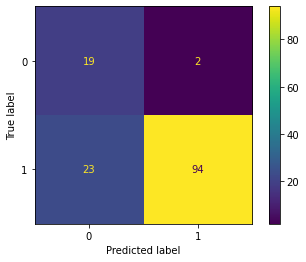

In [92]:
accuracy24=[]
precision=[]
recall=[]
f1score=[]
auc=[]

yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

par=best_params_list1[ac_list1.index(max(ac_list1))]
criterion=par['criterion']
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']

cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gb_best = GradientBoostingClassifier(criterion= criterion, learning_rate= learning_rate, max_depth= max_depth, 
                                     max_features=max_features, n_estimators= n_estimators)
    y_pred = fit_eval_model(gb_best, X_train, y_train, X_test, y_test)
    gb_best.fit(X_train, y_train)
    y_pred = gb_best.predict(X_test)
    
    accuracy24.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy24)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy24))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

In [87]:
best_params_list1[ac_list1.index(max(ac_list1))]

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'max_depth': 10,
 'max_features': 1,
 'n_estimators': 150}

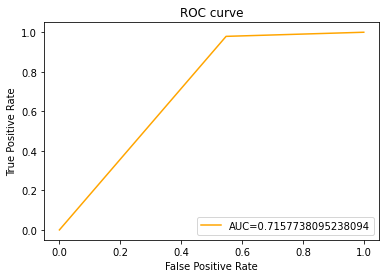

In [88]:
y_pred_proba = gb_best.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Saving best model

In [89]:
with open('mentalhealth_model.pkl', 'wb') as file:
    pickle.dump(gb1, file)

print('model saved')

model saved
